# import libraries

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
import pandas as pd
import seaborn as sns
import random
import tensorflow as tf
import mahotas
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from mpl_toolkits.mplot3d import Axes3D

# fuctions definition

In [2]:
def read_image(base_path, key, imgName):
    file_path = os.path.join(base_path, key[0] + "___" + key[1], imgName)

    img = cv2.imread(file_path)

    return img

In [3]:
# function returns a dictionary of images names sorted in this form {(plant, disease) : [img1, img2, ....]} where images stored in folders having names in this form plant___disease
def read_images_names(folder_path):
    
    # List all files in the dataset directory
    all_folder_names = os.listdir(folder_path)
    
    # store the names of training images depending on their folder names (plant___disease)
    images_names_dict = { (folder_name.split("___")[0], folder_name.split("___")[1]): os.listdir(os.path.join(folder_path, folder_name))
    for folder_name in all_folder_names }
    return images_names_dict

In [4]:
# n the number of images from each class
def sample_imgs_gray_resized(images_names_dict, new_dimensions, n):
    
    label=[]
    imgs_sample=[]
    for key, values in images_names_dict.items():
        for imgName in values[0:n]:
            label.append(list(key))
            img = read_image(train_dir, key, imgName)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, new_dimensions, interpolation = cv2.INTER_AREA)/255
            flattened_image = img.flatten()
            imgs_sample.append(flattened_image)
            
    return imgs_sample, label

In [5]:
def sample_2Dimgs_gray_resized(images_names_dict, new_dimensions, n):
    
    label=[]
    imgs_sample=[]
    for key, values in images_names_dict.items():
        for imgName in values[0:n]:
            label.append(list(key))
            img = read_image(train_dir, key, imgName)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, new_dimensions, interpolation = cv2.INTER_AREA)/255
            imgs_sample.append(img)
            
    return imgs_sample, label

In [102]:
def concat_columns(df):
    # Ensure the dataframe has at least two columns
    if df.shape[1] < 2:
        raise ValueError("Input dataframe must have at least two columns")
    
    # Concatenate the values of the first two columns
    concatenated_col = df.iloc[:, 0].astype(str) + '-' + df.iloc[:, 1].astype(str)
    
    # Create a new dataframe with the concatenated column
    new_df = pd.DataFrame({f'{df.columns[0]}.{df.columns[1]}': concatenated_col})
    
    return new_df

In [115]:
def create_table_and_save(x, y, filename='table.png'):
    # Create a DataFrame from the lists
    data = {'Name': x, 'Code': y}
    df = pd.DataFrame(data)
    
    # Plot the table
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    
    # Create the table
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
    
    # Customize the table
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    
    # Calculate cell sizes based on text length
    max_col_width = [max(len(str(cell)) for cell in df[col]) for col in df.columns]
    cell_widths = [width * 0.1 for width in max_col_width]  # Adjust multiplier as needed

    # Adjust the size of the figure based on content
    fig_width = sum(cell_widths) + 2
    fig_height = len(df) * 0.4 + 1  # Adjust as needed

    fig.set_size_inches(fig_width, fig_height)
    
    # Set column widths
    for i, width in enumerate(cell_widths):
        table.auto_set_column_width(i)

    # Set colors for the cells
    for (i, j), cell in table.get_celld().items():
        if i == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor('#40466e')
        else:
            cell.set_facecolor('#f5f5f5' if i % 2 == 0 else '#e0e0e0')
    
    # Save the table as an image
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    
    # Show the plot (optional)
    plt.show()

# read data (images)

In [6]:
# Directory containing the dataset
# Define paths relative to the script's location
current_dir = os.getcwd()
# Navigate to the parent directory
parent_dir = os.path.dirname(current_dir)

# train data dir
train_dir = os.path.join(parent_dir, 'plantReco/data/images/Plant_Diseases_Dataset/train')


In [7]:
train_images_names_dict = read_images_names(train_dir)

In [8]:
n=400
new_dim = (64, 64)

In [9]:
train_imgs_sample_features, train_label=sample_imgs_gray_resized(train_images_names_dict, new_dim, n)

In [10]:
len(train_imgs_sample_features[20])

4096

In [11]:
type(train_imgs_sample_features[20])

numpy.ndarray

In [12]:
len(train_imgs_sample_features)

15200

In [13]:
# Stack the arrays along the first axis to create a dataset
features = np.stack(train_imgs_sample_features, axis=0)

In [14]:
#np.savetxt('fit_test_04_01_features.csv', features, delimiter=',')


In [255]:
#features = np.loadtxt('fit_test_04_01_features.csv', delimiter=',')

# Study 1: PCA with different Calssification methods

##  PCA : choosing the number PCA of components

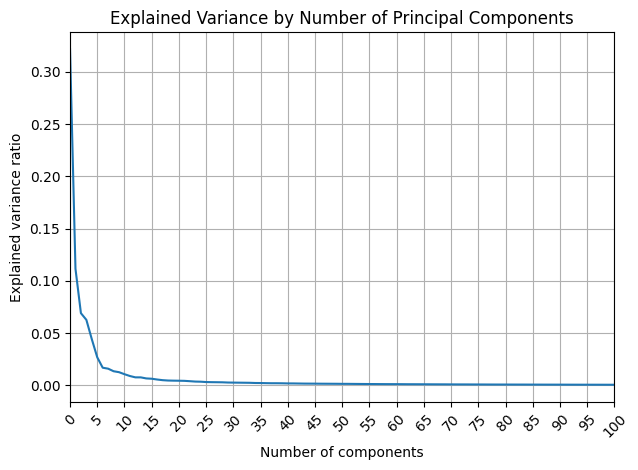

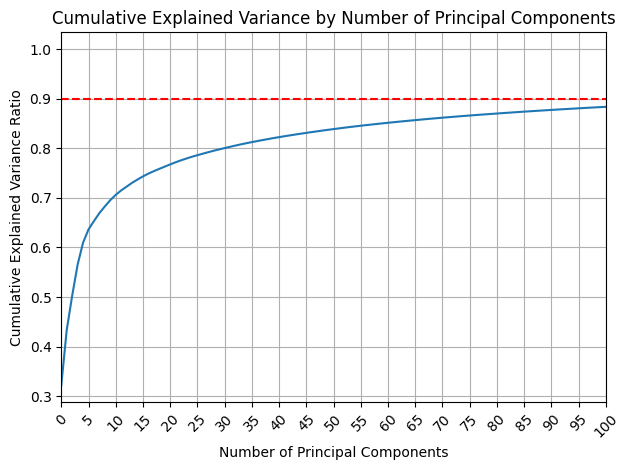

In [16]:
pca_2 = PCA()
pca_2.fit(features)

plt.figure()
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)  # Optionally add a grid for better readability
plt.xlim(0, 100)
# Set x-axis ticks with a step of 1
plt.xticks(range(0, 101, 5), rotation=45)
plt.tight_layout()  # Adjust the layout to make sure everything fits well
plt.plot(pca_2.explained_variance_ratio_);
plt.savefig("pca_explained_variance_ratio.png")

plt.figure()
plt.xlim(0, 100)
# Set x-axis ticks with a step of 1
plt.xticks(range(0, 101, 5), rotation=45)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid(True)  # Optionally add a grid for better readability
plt.axhline(y = 0.9, color = 'r', linestyle = '--')
plt.tight_layout()  # Adjust the layout to make sure everything fits well
plt.plot(pca_2.explained_variance_ratio_.cumsum());
plt.savefig("pca_cusum.png")

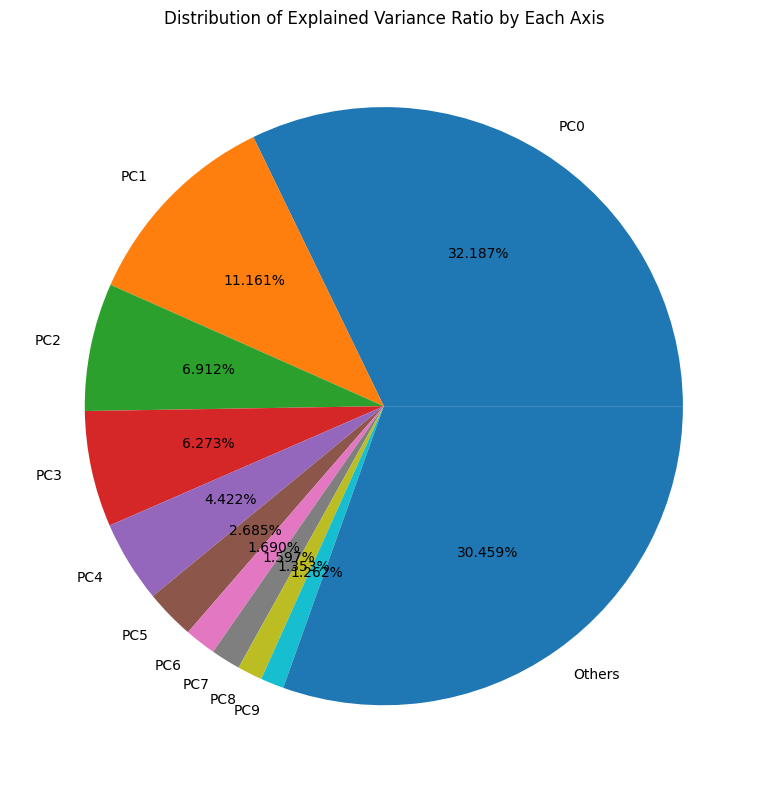

In [17]:

# Number of principal components
n_comp = 10

# Generate labels for the principal components
pca_labels_names = ['PC' + str(i) for i in range(n_comp)]
pca_labels_names.append('Others')

# Create the list of explained variance ratios
L1 = list(pca_2.explained_variance_ratio_[0:n_comp])
L1.append(sum(pca_2.explained_variance_ratio_[n_comp:]))

# Create the figure and axis with a larger size
fig, ax = plt.subplots(figsize=(10, 8))

# Create the pie chart
ax.pie(L1, labels=pca_labels_names, autopct='%1.3f%%')

# Set the title
ax.set_title('Distribution of Explained Variance Ratio by Each Axis')

# Adjust the layout to make sure everything fits well
plt.tight_layout()

# Save the figure
plt.savefig("distribution_explained_variance.png")

# Display the figure
plt.show()


([<matplotlib.patches.Wedge at 0x1d9e65ec910>,
 [Text(0.12809942754193449, 1.0925156917241183, 'PC1'),
  Text(-1.0599138893486635, -0.29424912432459244, 'PC2'),
  Text(-0.5113768572314802, -0.9739064174180467, 'PC3'),
  Text(0.12307185299380011, -1.093093463067396, 'PC4'),
  Text(0.6167958920419637, -0.9108033967658214, 'PC5'),
  Text(0.8727030341147199, -0.6696188574457578, 'PC6'),
  Text(0.9871910128427847, -0.4852359262899206, 'PC7'),
  Text(1.048119567239693, -0.333834349295094, 'PC8'),
  Text(1.0831830516855985, -0.1916102203460828, 'PC9'),
  Text(1.0982140754058707, -0.06265656055377475, 'PC10')],
 [Text(0.06987241502287335, 0.5959176500313372, '46.285%'),
  Text(-0.5781348487356345, -0.16049952235886858, '16.050%'),
  Text(-0.27893283121717094, -0.5312216822280255, '9.939%'),
  Text(0.06713010163298187, -0.5962327980367614, '9.020%'),
  Text(0.3364341229319802, -0.4968018527813571, '6.359%'),
  Text(0.47601983678984716, -0.3652466495158679, '3.861%'),
  Text(0.5384678251869733, 

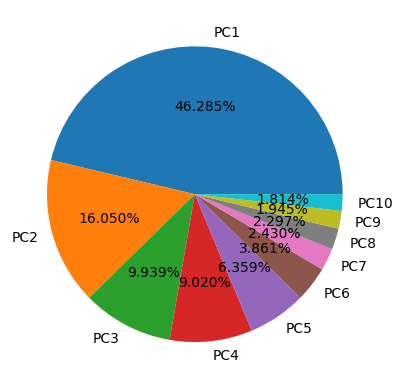

In [18]:
# Pie chart of the distribution of the explained variance ratio by each axis.
L1 = list(pca_2.explained_variance_ratio_[0:10])
labels_names = ['PC'+str(i) for i in range(1,11)]
plt.pie(L1, labels=labels_names, 
        autopct='%1.3f%%')

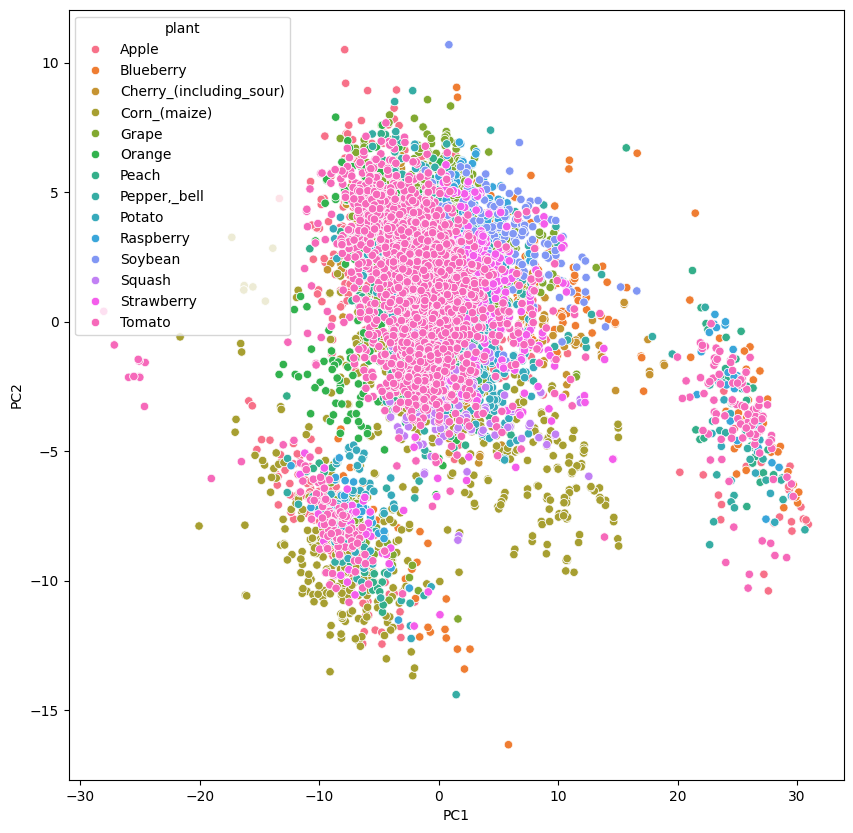

In [296]:
#df_notEncoded
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', hue='plant', data=df_notEncoded)
plt.show()


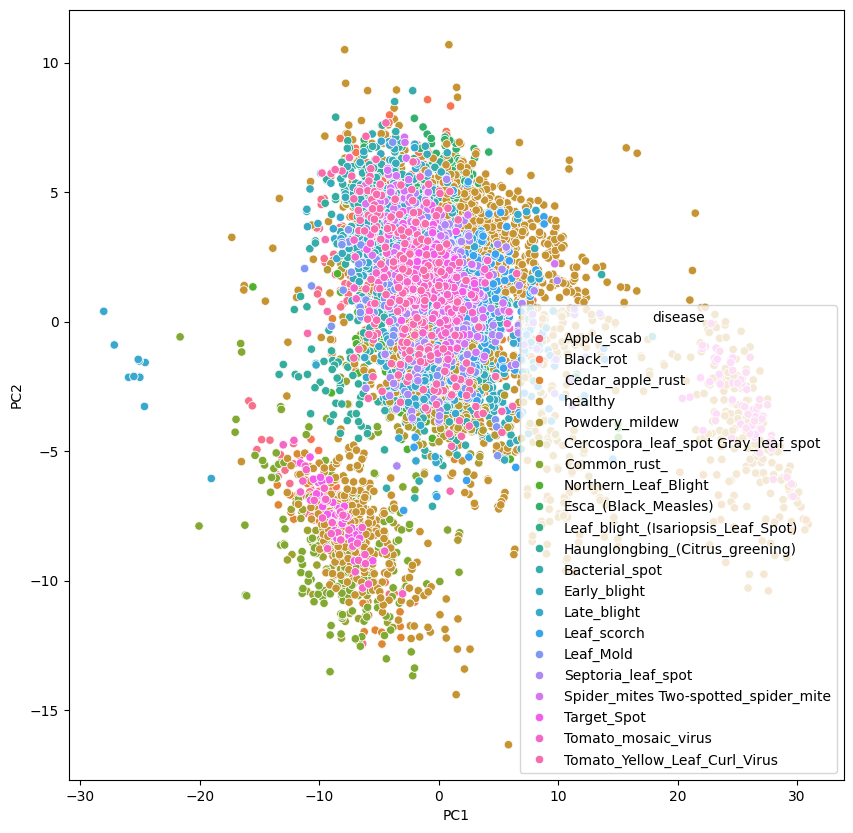

In [297]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x='PC1', y='PC2', hue='disease',data=df_notEncoded);

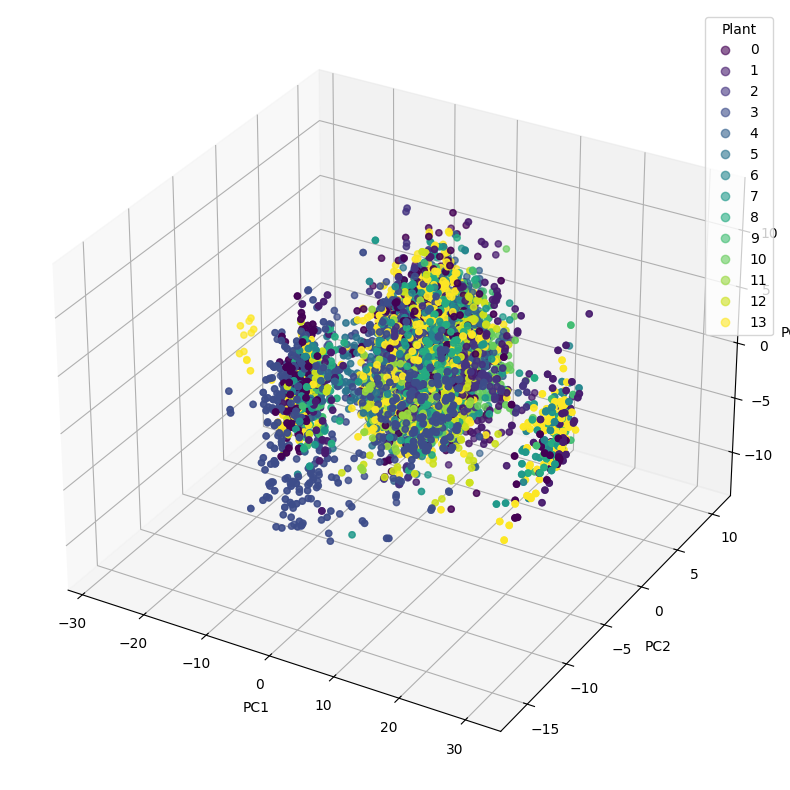

In [298]:
# Create a 3D figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot
sc = ax.scatter(df['PC1'], df['PC2'], df['PC3'], c=df['plant'], cmap='viridis')

# Add axis labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Create a legend
handles, labels = sc.legend_elements(prop="colors", alpha=0.6)
# Extracting integer labels from the formatted strings
labels = [int(label.split('{')[-1].split('}')[0]) for label in labels]
legend_labels = le.inverse_transform(labels)
ax.legend(handles, legend_labels, title="Plant")

# Show the plot
plt.show()




## PCA for 10 components

In [19]:
# Initialize PCA to reduce to 10 components
pca_n_comp = 10
pca = PCA(n_components=pca_n_comp )

# Fit PCA on the features and transform the data
reduced_features = pca.fit_transform(features)

# Output the shapes of the original and reduced features
print("Original shape:", features.shape)
print("Reduced shape:", reduced_features.shape)

Original shape: (15200, 4096)
Reduced shape: (15200, 10)


In [20]:
len(train_label)

15200

In [21]:
reduced_features_df = pd.DataFrame(reduced_features, columns=[f'PC{i+1}' for i in range(reduced_features.shape[1])])

In [22]:
reduced_features_df.tail(300)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
14900,2.334145,-1.601787,1.557771,-0.485994,-1.281140,-0.447822,1.902405,-0.258129,-1.068441,0.432939
14901,2.334145,-1.601787,1.557771,-0.485994,-1.281140,-0.447822,1.902405,-0.258129,-1.068441,0.432939
14902,-3.281139,1.689366,3.657871,1.578143,-0.315099,1.254059,1.128254,-0.899671,0.598723,0.519367
14903,-3.281139,1.689366,3.657871,1.578143,-0.315099,1.254059,1.128254,-0.899671,0.598723,0.519367
14904,-8.086136,5.811672,-3.374911,1.091992,2.148368,0.967203,0.048056,-0.640946,-0.129836,0.396118
...,...,...,...,...,...,...,...,...,...,...
15195,-6.719709,4.291242,-2.370982,-1.990255,2.337830,1.971615,2.173961,-2.344118,0.585724,0.021816
15196,-5.538563,4.353336,0.390029,-2.967439,2.060086,-0.198380,0.540085,-0.424421,-0.722114,1.850394
15197,-5.538563,4.353336,0.390029,-2.967439,2.060086,-0.198380,0.540085,-0.424421,-0.722114,1.850394
15198,-4.895766,5.299892,3.634868,-0.113893,1.508350,-0.972128,1.860284,1.428481,0.191738,0.910433


## labeling and data splitting

In [23]:
train_label_plant = [em[0] for em in train_label]
train_label_disease = [em[1] for em in train_label]

In [24]:
reduced_features_df['plant']=train_label_plant
reduced_features_df['disease']=train_label_disease

In [25]:
#reduced_features_df.to_csv('fit_test_04_01_pca_features.csv', index=False)

In [26]:
#df = pd.read_csv('fit_test_04_01_pca_features.csv')
df = reduced_features_df
df_notEncoded = reduced_features_df.copy()

In [27]:
df.tail(200)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,plant,disease
15000,-6.779692,5.050749,-3.195552,0.804621,3.076511,0.845210,0.607609,-0.026109,-1.498418,2.718899,Tomato,Tomato_Yellow_Leaf_Curl_Virus
15001,-6.779692,5.050749,-3.195552,0.804621,3.076511,0.845210,0.607609,-0.026109,-1.498418,2.718899,Tomato,Tomato_Yellow_Leaf_Curl_Virus
15002,2.031426,0.458515,5.568218,2.579162,-0.838582,-0.660493,-0.011680,0.909257,-0.160521,0.500167,Tomato,Tomato_Yellow_Leaf_Curl_Virus
15003,2.031426,0.458515,5.568218,2.579162,-0.838582,-0.660493,-0.011680,0.909257,-0.160521,0.500167,Tomato,Tomato_Yellow_Leaf_Curl_Virus
15004,-4.844854,3.176644,-1.724667,3.037915,1.364100,-1.517752,-0.236913,1.013865,-2.750976,2.615620,Tomato,Tomato_Yellow_Leaf_Curl_Virus
...,...,...,...,...,...,...,...,...,...,...,...,...
15195,-6.719709,4.291242,-2.370982,-1.990255,2.337830,1.971615,2.173961,-2.344118,0.585724,0.021816,Tomato,Tomato_Yellow_Leaf_Curl_Virus
15196,-5.538563,4.353336,0.390029,-2.967439,2.060086,-0.198380,0.540085,-0.424421,-0.722114,1.850394,Tomato,Tomato_Yellow_Leaf_Curl_Virus
15197,-5.538563,4.353336,0.390029,-2.967439,2.060086,-0.198380,0.540085,-0.424421,-0.722114,1.850394,Tomato,Tomato_Yellow_Leaf_Curl_Virus
15198,-4.895766,5.299892,3.634868,-0.113893,1.508350,-0.972128,1.860284,1.428481,0.191738,0.910433,Tomato,Tomato_Yellow_Leaf_Curl_Virus


In [28]:
plant_encoder = LabelEncoder()
disease_encoder = LabelEncoder()
df['plant'] = plant_encoder.fit_transform(df['plant'])
df['disease'] = disease_encoder.fit_transform(df['disease'])

In [29]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,plant,disease
0,-0.080195,-0.192149,-6.428417,-0.568428,-0.309998,1.945478,-0.805747,0.825480,-2.367443,1.302733,0,0
1,-0.080195,-0.192149,-6.428417,-0.568428,-0.309998,1.945478,-0.805747,0.825480,-2.367443,1.302733,0,0
2,-7.367951,0.850983,-3.133968,0.619551,0.032742,-1.896683,0.848485,-1.147643,-1.601405,1.156868,0,0
3,-7.367951,0.850983,-3.133968,0.619551,0.032742,-1.896683,0.848485,-1.147643,-1.601405,1.156868,0,0
4,-7.567143,1.150959,1.033766,3.553575,-0.581017,1.811793,0.024286,1.770158,-0.251009,1.668415,0,0


In [30]:
# Get the names of the labels
plant_types = plant_encoder.inverse_transform(df['plant'].unique())
disease_types = disease_encoder.inverse_transform(df['disease'].unique())

In [104]:
plant_types

array(['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)',
       'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry',
       'Soybean', 'Squash', 'Strawberry', 'Tomato'], dtype=object)

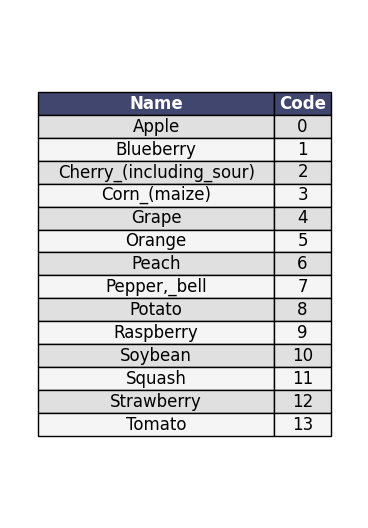

In [116]:
create_table_and_save(plant_types,range(len(plant_types)),'plants_types.png')

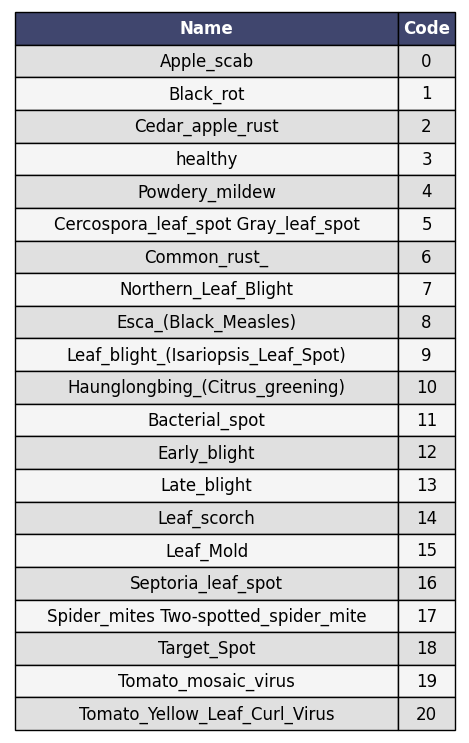

In [118]:
create_table_and_save(disease_types,range(len(disease_types)),'disease_types.png')

In [ ]:
# Create scatter plot
plt.scatter(x, y, color='blue', marker='o')

# Add titles and labels
plt.title('Sample Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Display the plot
plt.show()

In [46]:
target = df[['plant','disease']]

In [47]:
data = df.drop(['plant','disease'], axis=1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42, shuffle=True)

## PCA=10 + RandomForestClassifier

In [49]:
# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
 y_train.shape

(12160, 2)

In [78]:
# Make predictions
y_pred = model.predict(X_test)


In [79]:
y_pred_df = pd.DataFrame(y_pred)

In [80]:
y_test.shape

(3040, 2)

In [53]:
y_pred_df.shape

(3040, 2)

In [54]:
#y_test = y_test.reset_index()

In [81]:
crosstab_plant = pd.crosstab( list(y_test['plant']), list(y_pred_df[0]) )

In [82]:
print(crosstab_plant)

col_0   0   1    2    3    4   5    6    7    8   9   10  11   12   13
row_0                                                                 
0      273   0    0    4    0   4    2    0    6   0   0   0    4   28
1        2  62    4    2    0   0    0    0    0   0   0   0    0    0
2        0   0  146    2    0   0    0    0    6   0   0   0    0    8
3        6   0    0  330    0   0    2    0    2   0   0   0    2   12
4        0   0    0    2  293   0    0    0    2   0   2   0    8    4
5        0   0    0    0    2  62    0    0    0   0   0   0    0    6
6        2   0    0    2    2   0  135    0    2   0   0   0    0    2
7        4   0    2    0   12   0    0  130   10   0   2   2    2    6
8        0   0    0    0    6   0    0    0  232   0   0   0    2   12
9        0   0    0    0    6   0    0    0    0  72   0   0    2    2
10       0   0    0    0    6   2    0    2    0   0  77   0    0    2
11       0   0    0    6    0   0    0    0    0   0   0  59    0    4
12    

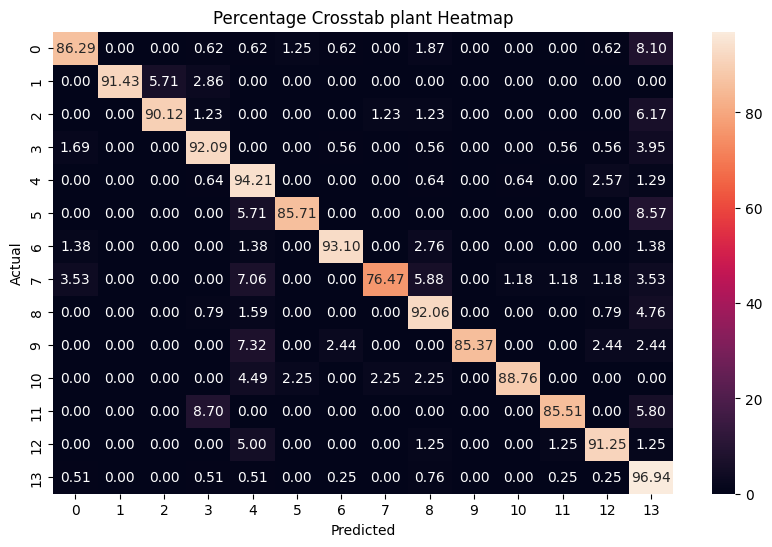

In [283]:
# Convert crosstab values to percentages
crosstab_plant_percentage = crosstab_plant.div(crosstab_plant.sum(axis=1), axis=0) * 100

# Plotting the crosstab percentage as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_plant_percentage, annot=True, fmt='.2f')
plt.title('Percentage Crosstab plant Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

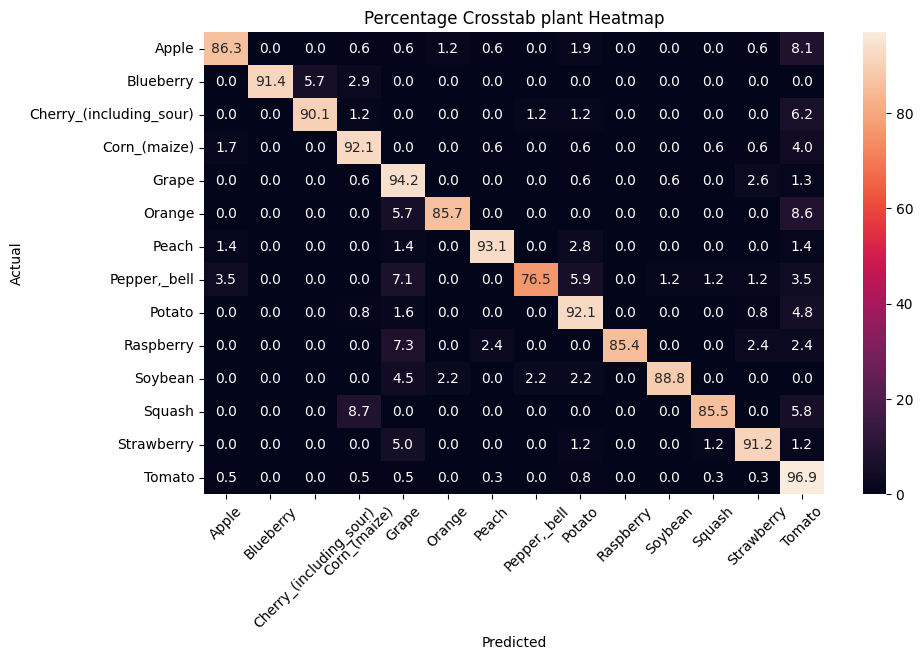

In [284]:
# Plotting the crosstab percentage as a heatmap
plt.figure(figsize=(10, 6))
#sns.heatmap(crosstab_plant_percentage, annot=True, fmt='.2f')
sns.heatmap(crosstab_plant_percentage, annot=True, 
            fmt='.1f', xticklabels=plant_types, yticklabels=plant_types)
plt.title('Percentage Crosstab plant Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.show()

In [83]:

# Confusion Matrix
conf_mat = confusion_matrix(y_test['plant'], y_pred_df[0])

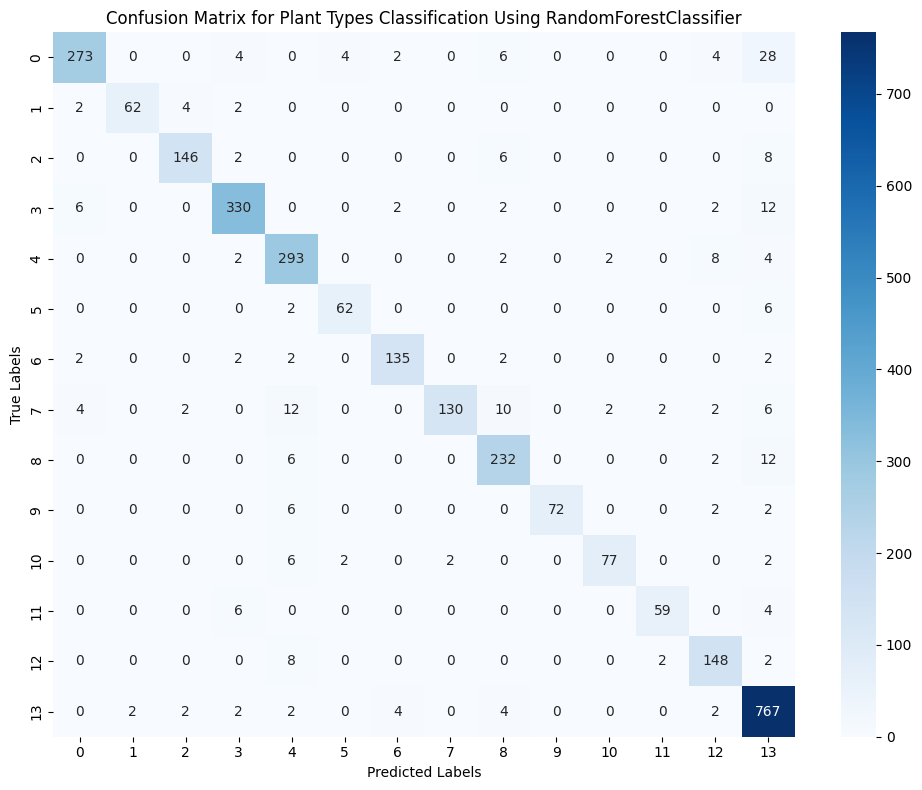

In [84]:
# Create the heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')

# Set the labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Plant Types Classification Using RandomForestClassifier')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("plant_types_Confusion_Matrix_RandomForestClassifier.png")
plt.show()


In [85]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test['plant'], y_pred_df[0]))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       321
           1       0.97      0.89      0.93        70
           2       0.95      0.90      0.92       162
           3       0.94      0.93      0.94       354
           4       0.87      0.94      0.90       311
           5       0.91      0.89      0.90        70
           6       0.94      0.93      0.94       145
           7       0.98      0.76      0.86       170
           8       0.88      0.92      0.90       252
           9       1.00      0.88      0.94        82
          10       0.95      0.87      0.91        89
          11       0.94      0.86      0.89        69
          12       0.87      0.93      0.90       160
          13       0.90      0.98      0.94       785

    accuracy                           0.92      3040
   macro avg       0.93      0.89      0.91      3040
weighted avg       0.92      0.92      0.92      3040



In [98]:
classification_report_RandomForest = classification_report(y_test['plant'], y_pred_df[0], output_dict=True)
classification_report_RandomForest_df = pd.DataFrame(classification_report_RandomForest)

In [99]:
classification_report_RandomForest_df.to_csv('classification_report_RandomForest_df.csv', index=False)
classification_report_RandomForest_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,accuracy,macro avg,weighted avg
precision,0.938144,0.969697,0.948718,0.937143,0.865103,0.911765,0.956835,0.984848,0.878788,1.000000,0.974026,0.884058,0.858824,0.901060,0.914474,0.929215,0.917561
recall,0.850467,0.914286,0.913580,0.926554,0.948553,0.885714,0.917241,0.764706,0.920635,0.829268,0.842697,0.884058,0.912500,0.974522,0.914474,0.891770,0.914474
f1-score,0.892157,0.941176,0.930818,0.931818,0.904908,0.898551,0.936620,0.860927,0.899225,0.906667,0.903614,0.884058,0.884848,0.936353,0.914474,0.907981,0.913947
support,321.000000,70.000000,162.000000,354.000000,311.000000,70.000000,145.000000,170.000000,252.000000,82.000000,89.000000,69.000000,160.000000,785.000000,0.914474,3040.000000,3040.000000


In [289]:
crosstab_diseases = pd.crosstab( list(y_test['disease']), list(y_pred_df[1]) )
#print(crosstab_diseases)

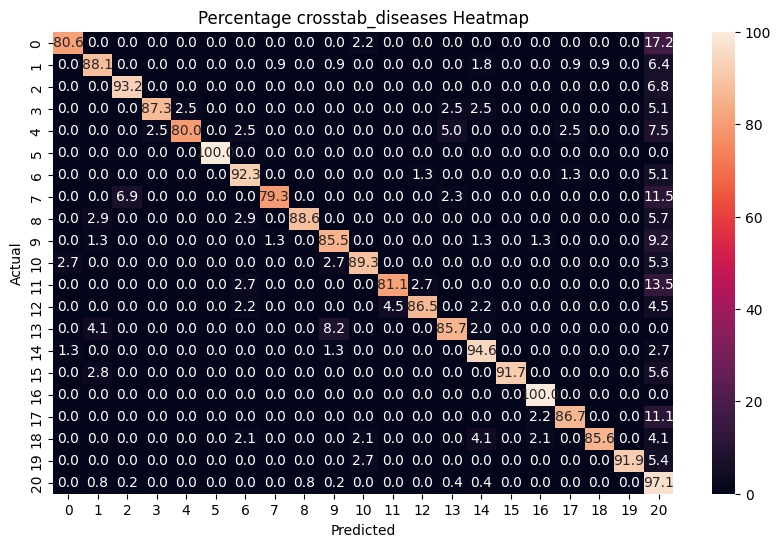

In [290]:
# Convert crosstab_diseases values to percentages
crosstab_diseases_percentage = crosstab_diseases.div(crosstab_diseases.sum(axis=1), axis=0) * 100

# Plotting the crosstab_diseases percentage as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_diseases_percentage, annot=True, fmt='.1f')
plt.title('Percentage crosstab_diseases Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

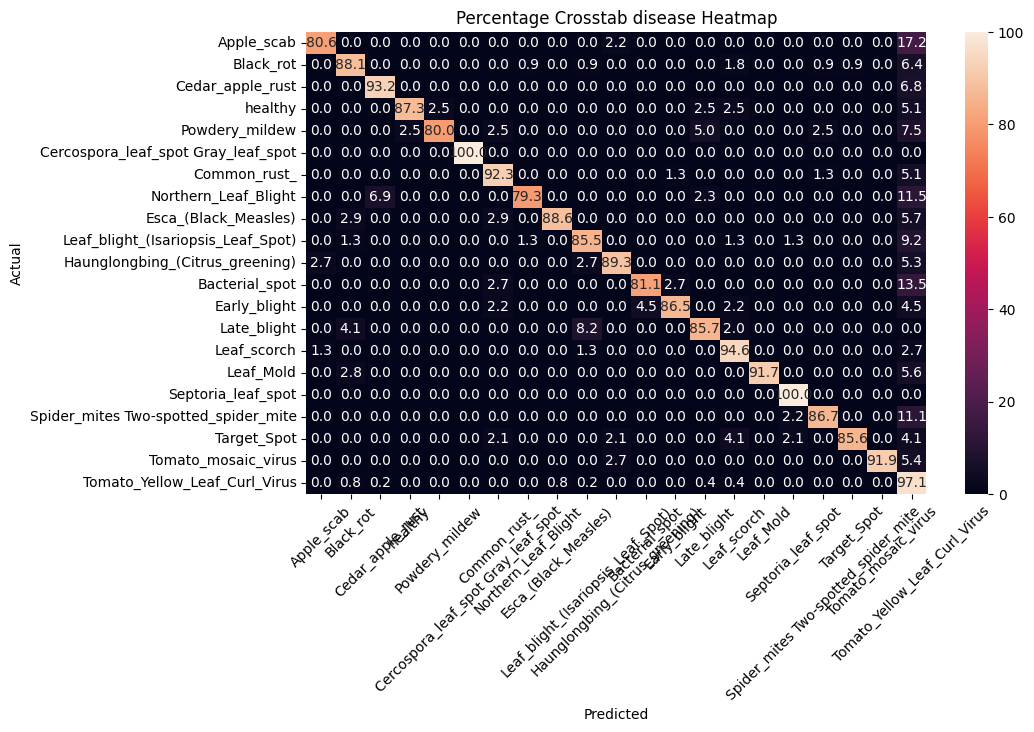

In [291]:
# Plotting the crosstab percentage as a heatmap
plt.figure(figsize=(10, 6))
#sns.heatmap(crosstab_disease_percentage, annot=True, fmt='.2f')
sns.heatmap(crosstab_diseases_percentage, annot=True, 
            fmt='.1f', xticklabels=disease_types, yticklabels=disease_types)
plt.title('Percentage Crosstab disease Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.show()

In [86]:
conf_mat = confusion_matrix(y_test['disease'], y_pred_df[1])

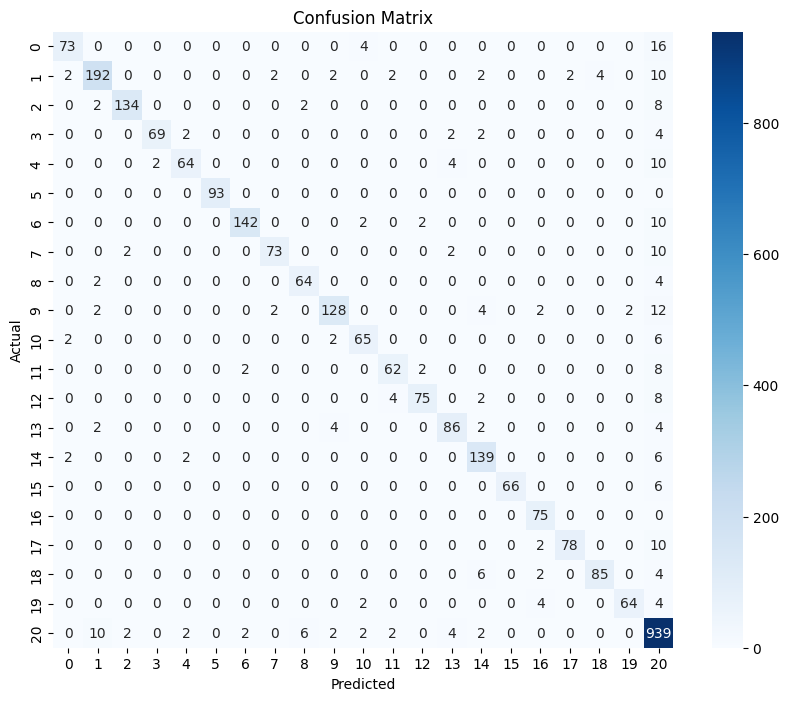

In [87]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [101]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test['disease'], y_pred_df[1],target_names=disease_types))

Classification Report:
                                      precision    recall  f1-score   support

                          Apple_scab       0.92      0.78      0.85        93
                           Black_rot       0.91      0.88      0.90       218
                    Cedar_apple_rust       0.97      0.92      0.94       146
                             healthy       0.97      0.87      0.92        79
                      Powdery_mildew       0.91      0.80      0.85        80
 Cercospora_leaf_spot Gray_leaf_spot       1.00      1.00      1.00        93
                        Common_rust_       0.97      0.91      0.94       156
                Northern_Leaf_Blight       0.95      0.84      0.89        87
                Esca_(Black_Measles)       0.89      0.91      0.90        70
  Leaf_blight_(Isariopsis_Leaf_Spot)       0.93      0.84      0.88       152
     Haunglongbing_(Citrus_greening)       0.87      0.87      0.87        75
                      Bacterial_spot    

In [96]:
def concat_columns(df):
    # Ensure the dataframe has at least two columns
    if df.shape[1] < 2:
        raise ValueError("Input dataframe must have at least two columns")
    
    # Concatenate the values of the first two columns
    concatenated_col = df.iloc[:, 0].astype(str) + '-' + df.iloc[:, 1].astype(str)
    
    # Create a new dataframe with the concatenated column
    new_df = pd.DataFrame({f'{df.columns[0]}.{df.columns[1]}': concatenated_col})
    
    return new_df

In [98]:
plant_types

array(['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)',
       'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry',
       'Soybean', 'Squash', 'Strawberry', 'Tomato'], dtype=object)

In [99]:
disease_types

array(['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'healthy',
       'Powdery_mildew', 'Cercospora_leaf_spot Gray_leaf_spot',
       'Common_rust_', 'Northern_Leaf_Blight', 'Esca_(Black_Measles)',
       'Leaf_blight_(Isariopsis_Leaf_Spot)',
       'Haunglongbing_(Citrus_greening)', 'Bacterial_spot',
       'Early_blight', 'Late_blight', 'Leaf_scorch', 'Leaf_Mold',
       'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite',
       'Target_Spot', 'Tomato_mosaic_virus',
       'Tomato_Yellow_Leaf_Curl_Virus'], dtype=object)

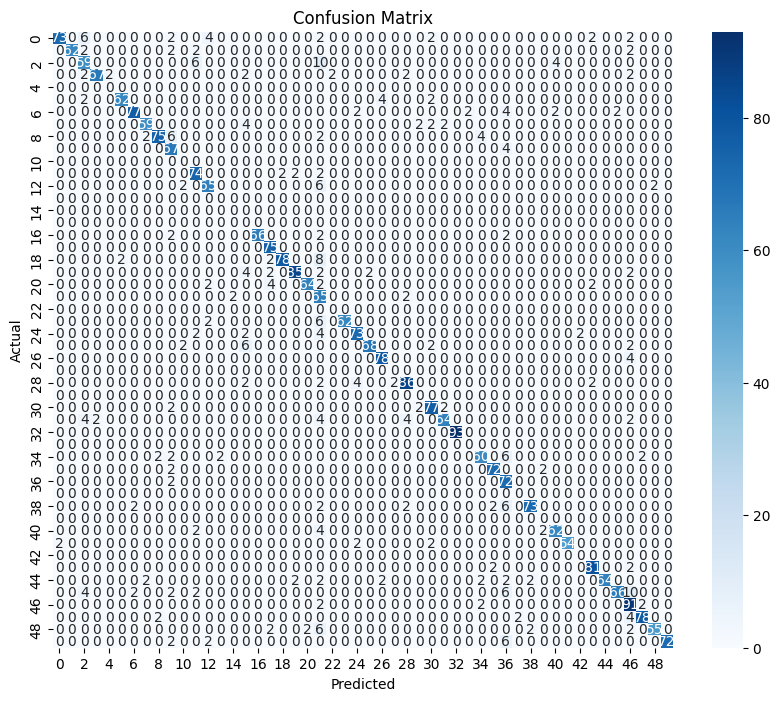

In [119]:
conf_mat = confusion_matrix(concat_columns(y_test), concat_columns(y_pred_df))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [97]:
# Classification Report
print("Classification Report:")
print(classification_report(concat_columns(y_test), concat_columns(y_pred_df)))

Classification Report:
              precision    recall  f1-score   support

         0-0       0.97      0.78      0.87        93
         0-2       1.00      0.89      0.94        70
        0-20       0.75      0.75      0.75        79
         0-3       0.97      0.85      0.91        79
         0-4       0.00      0.00      0.00         0
        1-20       0.97      0.89      0.93        70
       10-20       0.95      0.87      0.91        89
       11-14       0.94      0.86      0.89        69
       12-12       0.95      0.84      0.89        89
       12-20       0.74      0.94      0.83        71
        13-0       0.00      0.00      0.00         0
        13-1       0.84      0.93      0.88        80
       13-10       0.87      0.87      0.87        75
       13-11       0.00      0.00      0.00         0
       13-13       0.00      0.00      0.00         0
       13-14       0.00      0.00      0.00         0
       13-15       1.00      0.92      0.96        72
    

C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [90]:
concat_columns(y_test).head()

,plant.disease
3165,3.4
3691,3.20
3297,3.5
10409,12.20
7934,7.20


In [62]:
y_test.drop(columns='index', inplace=True)

In [58]:
y_pred_df.shape

(3040, 2)

In [68]:
y_test.head()

,plant,disease
0,3,4
1,3,20
2,3,5
3,12,20
4,7,20


In [295]:
df_notEncoded.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,plant,disease
0,-0.080195,-0.192149,-6.428417,-0.568428,-0.309998,1.945481,-0.805720,0.825113,-2.367990,1.305592,Apple,Apple_scab
1,-0.080195,-0.192149,-6.428417,-0.568428,-0.309998,1.945481,-0.805720,0.825113,-2.367990,1.305592,Apple,Apple_scab
2,-7.367951,0.850983,-3.133968,0.619551,0.032742,-1.896682,0.848499,-1.147801,-1.601789,1.157568,Apple,Apple_scab
3,-7.367951,0.850983,-3.133968,0.619551,0.032742,-1.896682,0.848499,-1.147801,-1.601789,1.157568,Apple,Apple_scab
4,-7.567143,1.150959,1.033766,3.553575,-0.581017,1.811791,0.024249,1.770116,-0.250750,1.667984,Apple,Apple_scab


## PCA=10 + K-NN Classification

### K-NN without one-hot encoding for labels

In [441]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Initialize K-NN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=10)
# Fit the model
knn_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred = knn_classifier.predict(X_test)



In [442]:
y_pred_df = pd.DataFrame(y_pred)

In [443]:
y_pred_df.columns = ['plant', 'disease']

In [444]:
y_pred_df.shape

(3040, 2)

In [445]:
y_test = y_test[['plant','disease']]

In [446]:
y_test.shape

(3040, 2)

In [447]:
# Calculate accuracy for plants types
accuracy_plant = accuracy_score(y_test['plant'], y_pred_df['plant'])
print(f'Accuracy plant: {accuracy_plant:.2f}')

Accuracy plant: 0.55


In [448]:
# Calculate accuracy for diseases types
accuracy_disease = accuracy_score(y_test['disease'], y_pred_df['disease'])
print(f'Accuracy disease: {accuracy_disease:.2f}')

Accuracy disease: 0.51


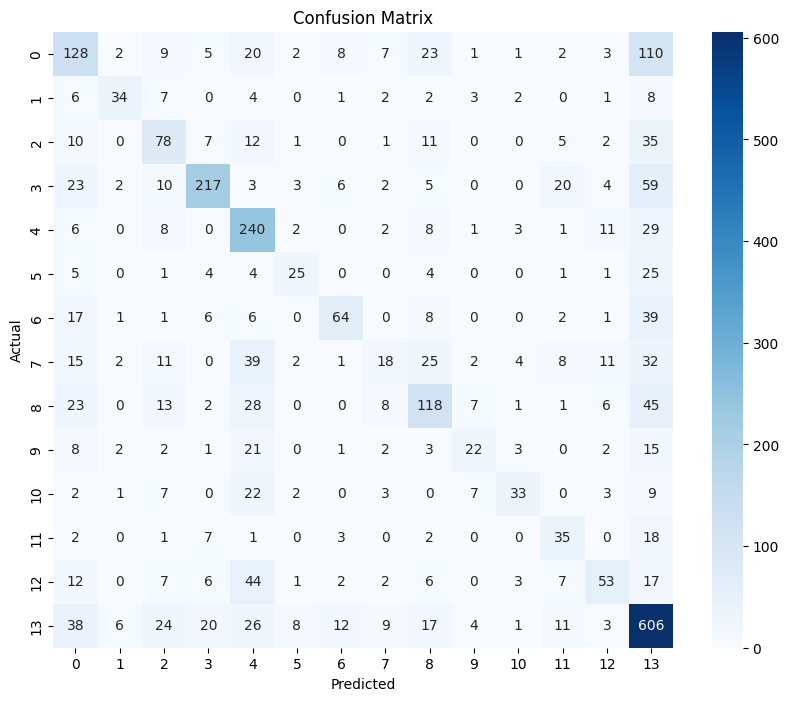

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.40      0.42       321
           1       0.68      0.49      0.57        70
           2       0.44      0.48      0.46       162
           3       0.79      0.61      0.69       354
           4       0.51      0.77      0.61       311
           5       0.54      0.36      0.43        70
           6       0.65      0.44      0.53       145
           7       0.32      0.11      0.16       170
           8       0.51      0.47      0.49       252
           9       0.47      0.27      0.34        82
          10       0.65      0.37      0.47        89
          11       0.38      0.51      0.43        69
          12       0.52      0.33      0.41       160
          13       0.58      0.77      0.66       785

    accuracy                           0.55      3040
   macro avg       0.53      0.46      0.48      3040
weighted avg       0.55      0.55      0.53      3040



In [449]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test['plant'], y_pred_df['plant'])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test['plant'], y_pred_df['plant']))

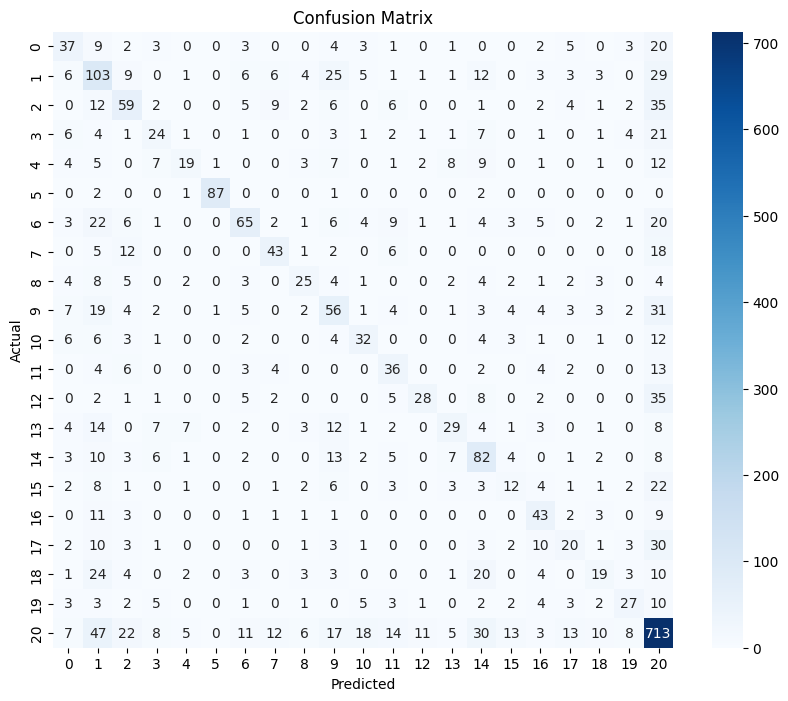

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.40      0.39        93
           1       0.31      0.47      0.38       218
           2       0.40      0.40      0.40       146
           3       0.35      0.30      0.33        79
           4       0.47      0.24      0.32        80
           5       0.98      0.94      0.96        93
           6       0.55      0.42      0.47       156
           7       0.54      0.49      0.51        87
           8       0.45      0.36      0.40        70
           9       0.32      0.37      0.34       152
          10       0.43      0.43      0.43        75
          11       0.37      0.49      0.42        74
          12       0.62      0.31      0.42        89
          13       0.48      0.30      0.37        98
          14       0.41      0.55      0.47       149
          15       0.26      0.17      0.20        72
          16       0.44      0.57      0.50        75
    

In [450]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test['disease'], y_pred_df['disease'])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test['disease'], y_pred_df['disease']))

### KNN classifer with one-hot encoding labels

In [151]:
def rename_df(df, name_added):
    df.columns = [name_added + '_' + str(em) for em in df.columns]


In [167]:
# Performing one-hot encoding with dtype as float
y_train_plant_encoded = pd.get_dummies(y_train['plant'], dtype=float)
# Performing one-hot encoding with dtype as float
y_train_disease_encoded = pd.get_dummies(y_train['disease'], dtype=float)

# Performing one-hot encoding with dtype as float
y_test_plant_encoded = pd.get_dummies(y_test['plant'], dtype=float)
# Performing one-hot encoding with dtype as float
y_test_disease_encoded = pd.get_dummies(y_test['disease'], dtype=float)

In [168]:
rename_df(y_train_plant_encoded, 'plant');
rename_df(y_test_plant_encoded, 'plant');
rename_df(y_train_disease_encoded, 'disease');
rename_df(y_test_disease_encoded, 'disease');


In [169]:
y_train_encoded = pd.concat([y_train_plant_encoded, y_train_disease_encoded], axis=1)
y_test_encoded = pd.concat([y_test_plant_encoded, y_test_disease_encoded], axis=1)

In [170]:
y_train_encoded.head()

,plant_0,plant_1,plant_2,plant_3,plant_4,plant_5,plant_6,plant_7,plant_8,plant_9,...,disease_11,disease_12,disease_13,disease_14,disease_15,disease_16,disease_17,disease_18,disease_19,disease_20
10683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5239,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [172]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Initialize K-NN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=10)
# Fit the model
knn_classifier.fit(X_train, y_train_encoded)
# Predict on the test set
y_pred = knn_classifier.predict(X_test)


In [176]:
y_pred_df = pd.DataFrame(y_pred)

In [198]:
y_pred_df.shape

(3040, 35)

In [184]:
def one_hot_decoding(df):
    # Get the column with the maximum value (1) for each row
    decoded = df.idxmax(axis=1)
    return decoded

In [197]:
y_test_encoded.shape

(3040, 35)

In [222]:
y_pred_df_decoded_plant = one_hot_decoding(y_pred_df.loc[:,0:len(plant_types)] )

In [227]:
y_pred_df_decoded_plant.shape

(3040,)

In [228]:
y_test['plant'].shape

(3040,)

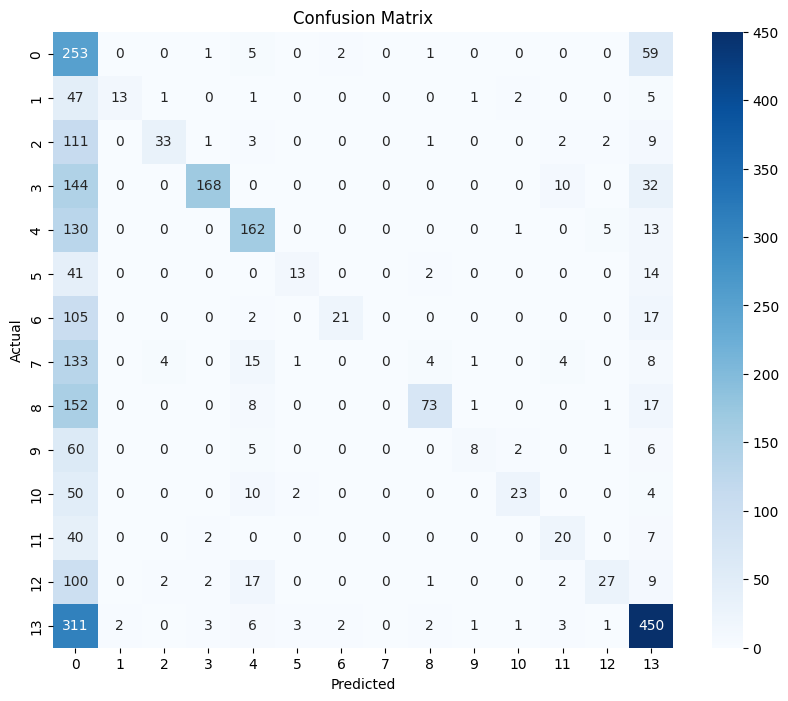

Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.79      0.25       321
           1       0.87      0.19      0.31        70
           2       0.82      0.20      0.33       162
           3       0.95      0.47      0.63       354
           4       0.69      0.52      0.59       311
           5       0.68      0.19      0.29        70
           6       0.84      0.14      0.25       145
           7       0.00      0.00      0.00       170
           8       0.87      0.29      0.43       252
           9       0.67      0.10      0.17        82
          10       0.79      0.26      0.39        89
          11       0.49      0.29      0.36        69
          12       0.73      0.17      0.27       160
          13       0.69      0.57      0.63       785

    accuracy                           0.42      3040
   macro avg       0.66      0.30      0.35      3040
weighted avg       0.66      0.42      0.44      3040



C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [226]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test['plant'], y_pred_df_decoded_plant )

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test['plant'], y_pred_df_decoded_plant))

## PCA=10 with DecisionTreeClassifier

In [455]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)

# Train the classifier
dtc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtc.predict(X_test)

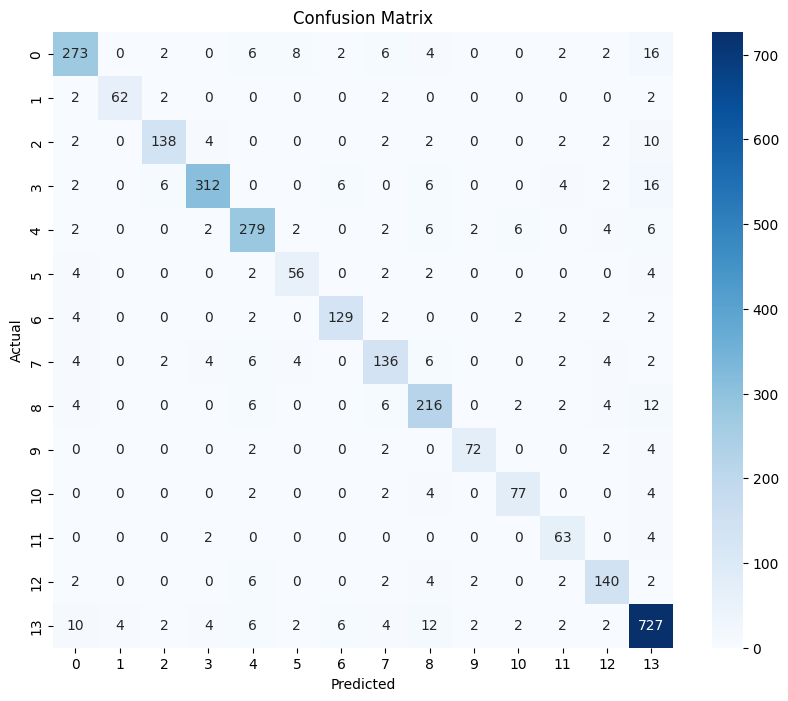

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       321
           1       0.94      0.89      0.91        70
           2       0.91      0.85      0.88       162
           3       0.95      0.88      0.91       354
           4       0.88      0.90      0.89       311
           5       0.78      0.80      0.79        70
           6       0.90      0.89      0.90       145
           7       0.81      0.80      0.80       170
           8       0.82      0.86      0.84       252
           9       0.92      0.88      0.90        82
          10       0.87      0.87      0.87        89
          11       0.78      0.91      0.84        69
          12       0.85      0.88      0.86       160
          13       0.90      0.93      0.91       785

    accuracy                           0.88      3040
   macro avg       0.87      0.87      0.87      3040
weighted avg       0.88      0.88      0.88      3040



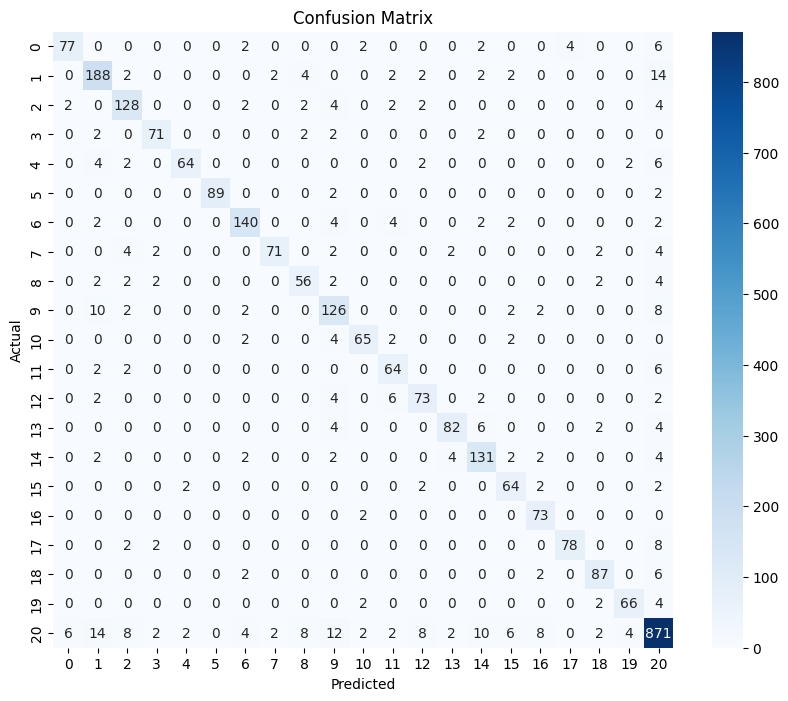

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        93
           1       0.82      0.86      0.84       218
           2       0.84      0.88      0.86       146
           3       0.90      0.90      0.90        79
           4       0.94      0.80      0.86        80
           5       1.00      0.96      0.98        93
           6       0.90      0.90      0.90       156
           7       0.95      0.82      0.88        87
           8       0.78      0.80      0.79        70
           9       0.75      0.83      0.79       152
          10       0.89      0.87      0.88        75
          11       0.78      0.86      0.82        74
          12       0.82      0.82      0.82        89
          13       0.91      0.84      0.87        98
          14       0.83      0.88      0.86       149
          15       0.80      0.89      0.84        72
          16       0.82      0.97      0.89        75
    

In [456]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['plant', 'disease']

y_test = y_test[['plant','disease']]

# Confusion Matrix
conf_mat = confusion_matrix(y_test['plant'], y_pred_df['plant'])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test['plant'], y_pred_df['plant']))

# Confusion Matrix
conf_mat = confusion_matrix(y_test['disease'], y_pred_df['disease'])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test['disease'], y_pred_df['disease']))

## PCA=10 with AdaBoostClassifier

In [468]:
# Boosting Algorithm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multioutput import MultiOutputClassifier

In [469]:
# Initialize the Decision Tree Classifier as the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Initialize the AdaBoost classifier
ada_boost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Initialize the MultiOutputClassifier with AdaBoostClassifier
multi_target_ada_boost = MultiOutputClassifier(ada_boost, n_jobs=-1)

# Train the multi-output AdaBoost classifier
multi_target_ada_boost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = multi_target_ada_boost.predict(X_test)


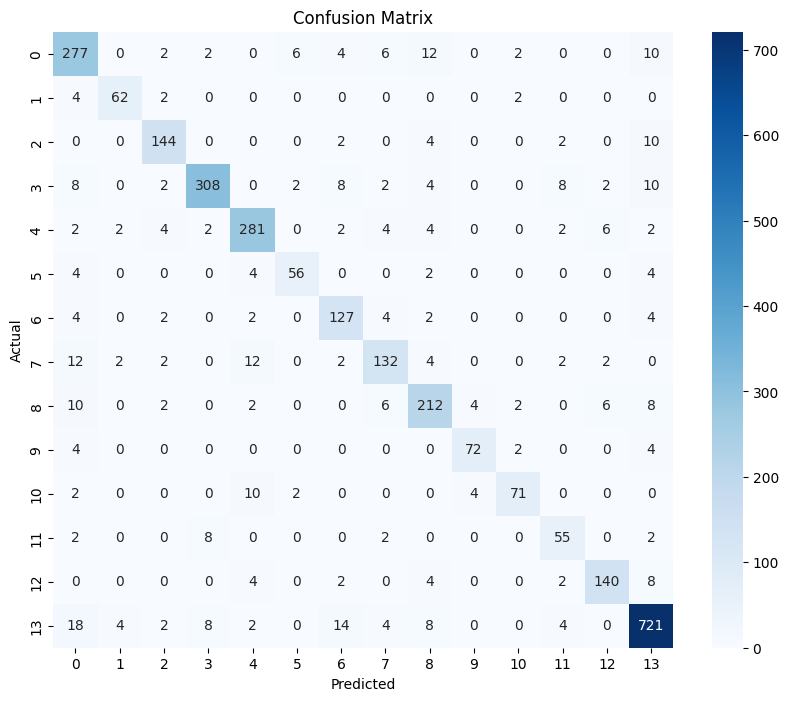

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       321
           1       0.89      0.89      0.89        70
           2       0.89      0.89      0.89       162
           3       0.94      0.87      0.90       354
           4       0.89      0.90      0.89       311
           5       0.85      0.80      0.82        70
           6       0.79      0.88      0.83       145
           7       0.82      0.78      0.80       170
           8       0.83      0.84      0.83       252
           9       0.90      0.88      0.89        82
          10       0.90      0.80      0.85        89
          11       0.73      0.80      0.76        69
          12       0.90      0.88      0.89       160
          13       0.92      0.92      0.92       785

    accuracy                           0.87      3040
   macro avg       0.86      0.86      0.86      3040
weighted avg       0.88      0.87      0.87      3040



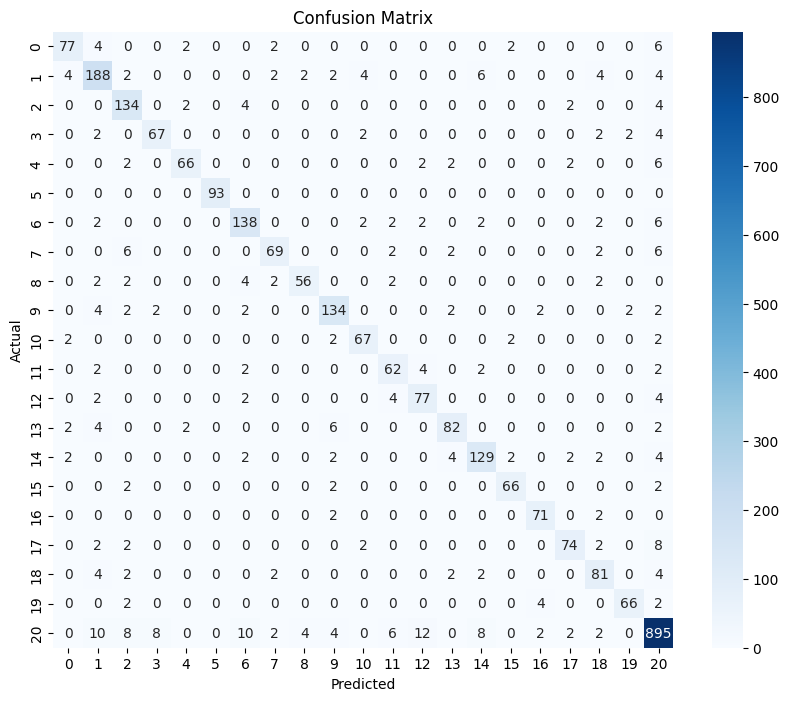

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        93
           1       0.83      0.86      0.85       218
           2       0.82      0.92      0.86       146
           3       0.87      0.85      0.86        79
           4       0.92      0.82      0.87        80
           5       1.00      1.00      1.00        93
           6       0.84      0.88      0.86       156
           7       0.87      0.79      0.83        87
           8       0.90      0.80      0.85        70
           9       0.87      0.88      0.88       152
          10       0.87      0.89      0.88        75
          11       0.79      0.84      0.82        74
          12       0.79      0.87      0.83        89
          13       0.87      0.84      0.85        98
          14       0.87      0.87      0.87       149
          15       0.92      0.92      0.92        72
          16       0.90      0.95      0.92        75
    

In [470]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['plant', 'disease']

y_test = y_test[['plant','disease']]

# Confusion Matrix
conf_mat = confusion_matrix(y_test['plant'], y_pred_df['plant'])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test['plant'], y_pred_df['plant']))

# Confusion Matrix
conf_mat = confusion_matrix(y_test['disease'], y_pred_df['disease'])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test['disease'], y_pred_df['disease']))

In [472]:
y_train.shape

(12160, 2)

## PCA=10 with LogisticRegression

In [473]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

# Initialize logistic regression classifier
logistic_regression = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Initialize multi-output classifier with logistic regression
multi_output_classifier = MultiOutputClassifier(logistic_regression)

# Fit the model
multi_output_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = multi_output_classifier.predict(X_test)

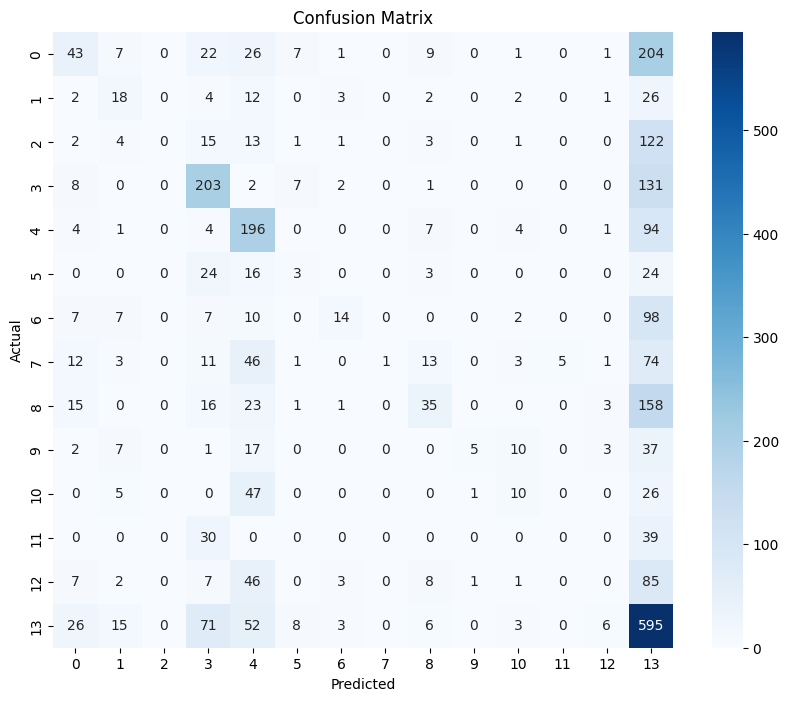

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.13      0.19       321
           1       0.26      0.26      0.26        70
           2       0.00      0.00      0.00       162
           3       0.49      0.57      0.53       354
           4       0.39      0.63      0.48       311
           5       0.11      0.04      0.06        70
           6       0.50      0.10      0.16       145
           7       1.00      0.01      0.01       170
           8       0.40      0.14      0.21       252
           9       0.71      0.06      0.11        82
          10       0.27      0.11      0.16        89
          11       0.00      0.00      0.00        69
          12       0.00      0.00      0.00       160
          13       0.35      0.76      0.48       785

    accuracy                           0.37      3040
   macro avg       0.34      0.20      0.19      3040
weighted avg       0.37      0.37      0.29      3040



C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

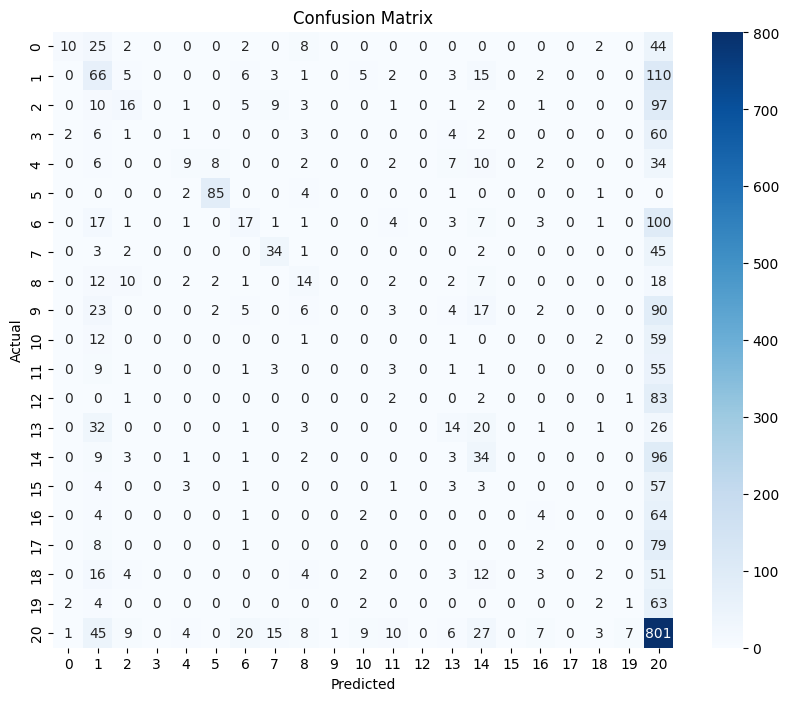

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.11      0.19        93
           1       0.21      0.30      0.25       218
           2       0.29      0.11      0.16       146
           3       0.00      0.00      0.00        79
           4       0.38      0.11      0.17        80
           5       0.88      0.91      0.89        93
           6       0.27      0.11      0.16       156
           7       0.52      0.39      0.45        87
           8       0.23      0.20      0.21        70
           9       0.00      0.00      0.00       152
          10       0.00      0.00      0.00        75
          11       0.10      0.04      0.06        74
          12       0.00      0.00      0.00        89
          13       0.25      0.14      0.18        98
          14       0.21      0.23      0.22       149
          15       0.00      0.00      0.00        72
          16       0.15      0.05      0.08        75
    

C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [474]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['plant', 'disease']

y_test = y_test[['plant','disease']]

# Confusion Matrix
conf_mat = confusion_matrix(y_test['plant'], y_pred_df['plant'])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test['plant'], y_pred_df['plant']))

# Confusion Matrix
conf_mat = confusion_matrix(y_test['disease'], y_pred_df['disease'])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test['disease'], y_pred_df['disease']))

## PCA=10 with SVC

In [476]:
from sklearn.svm import SVC
# Initialize SVM classifier with a linear kernel (or choose another kernel)
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')

# Initialize multi-output classifier with SVM
multi_output_classifier = MultiOutputClassifier(svm_classifier)

# Fit the model
multi_output_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = multi_output_classifier.predict(X_test)


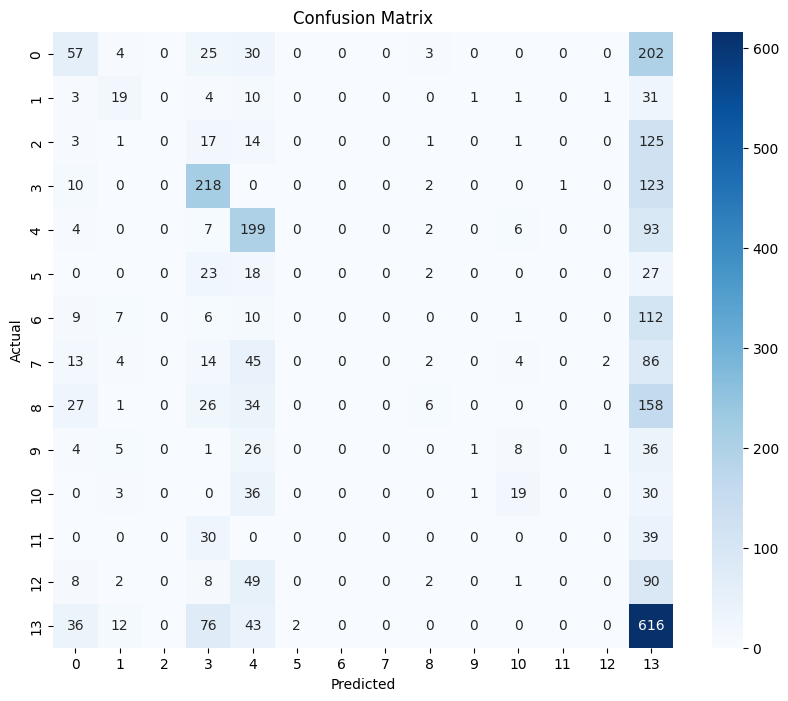

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.18      0.23       321
           1       0.33      0.27      0.30        70
           2       0.00      0.00      0.00       162
           3       0.48      0.62      0.54       354
           4       0.39      0.64      0.48       311
           5       0.00      0.00      0.00        70
           6       0.00      0.00      0.00       145
           7       0.00      0.00      0.00       170
           8       0.30      0.02      0.04       252
           9       0.33      0.01      0.02        82
          10       0.46      0.21      0.29        89
          11       0.00      0.00      0.00        69
          12       0.00      0.00      0.00       160
          13       0.35      0.78      0.48       785

    accuracy                           0.37      3040
   macro avg       0.21      0.20      0.17      3040
weighted avg       0.27      0.37      0.28      3040



C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

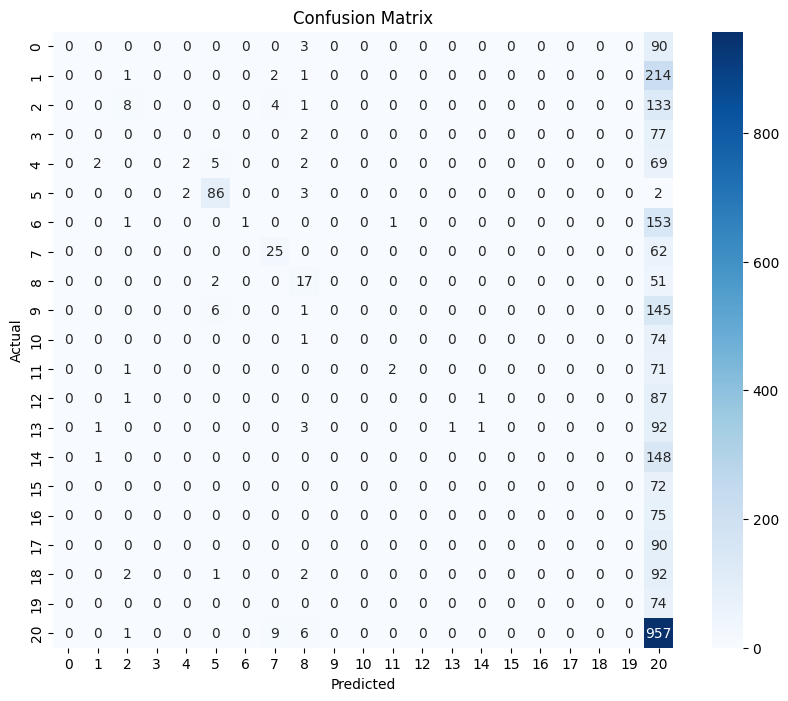

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.00      0.00      0.00       218
           2       0.53      0.05      0.10       146
           3       0.00      0.00      0.00        79
           4       0.50      0.03      0.05        80
           5       0.86      0.92      0.89        93
           6       1.00      0.01      0.01       156
           7       0.62      0.29      0.39        87
           8       0.40      0.24      0.30        70
           9       0.00      0.00      0.00       152
          10       0.00      0.00      0.00        75
          11       0.67      0.03      0.05        74
          12       0.00      0.00      0.00        89
          13       1.00      0.01      0.02        98
          14       0.00      0.00      0.00       149
          15       0.00      0.00      0.00        72
          16       0.00      0.00      0.00        75
    

C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [477]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['plant', 'disease']

y_test = y_test[['plant','disease']]

# Confusion Matrix
conf_mat = confusion_matrix(y_test['plant'], y_pred_df['plant'])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test['plant'], y_pred_df['plant']))

# Confusion Matrix
conf_mat = confusion_matrix(y_test['disease'], y_pred_df['disease'])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test['disease'], y_pred_df['disease']))

### SVM Hyperparameter Tuning using GridSearchCV 

In [479]:
from sklearn.model_selection import GridSearchCV
# Initialize SVM classifier
svm_classifier = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {
    'estimator__kernel': ['rbf', 'poly'],
    'estimator__C': [0.1, 10],  # Regularization parameter
}

"""
param_grid = {
    'estimator__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'estimator__C': [0.1, 1, 10],  # Regularization parameter
    'estimator__gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}
"""

# Initialize MultiOutputClassifier with SVM
multi_output_classifier = MultiOutputClassifier(svm_classifier)

# Initialize GridSearchCV
grid_search = GridSearchCV(multi_output_classifier, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


In [480]:
best_params

{'estimator__C': 0.1, 'estimator__kernel': 'rbf'}

In [481]:
best_model

MultiOutputClassifier(estimator=SVC(C=0.1))

In [482]:
# Fit the model
best_model.fit(X_train, y_train)
# Predict on the test set
y_pred = best_model.predict(X_test)

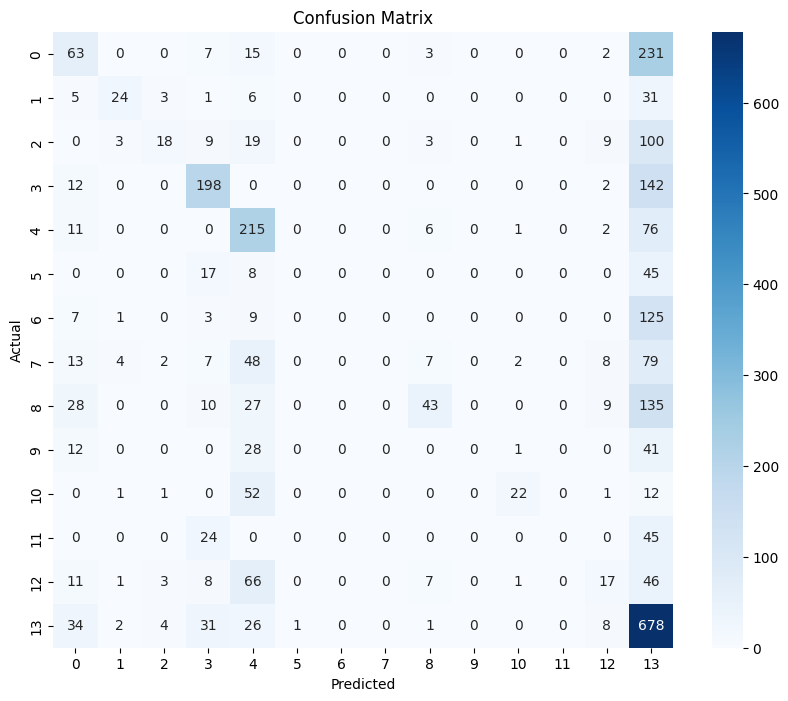

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.20      0.24       321
           1       0.67      0.34      0.45        70
           2       0.58      0.11      0.19       162
           3       0.63      0.56      0.59       354
           4       0.41      0.69      0.52       311
           5       0.00      0.00      0.00        70
           6       0.00      0.00      0.00       145
           7       0.00      0.00      0.00       170
           8       0.61      0.17      0.27       252
           9       0.00      0.00      0.00        82
          10       0.79      0.25      0.38        89
          11       0.00      0.00      0.00        69
          12       0.29      0.11      0.16       160
          13       0.38      0.86      0.53       785

    accuracy                           0.42      3040
   macro avg       0.33      0.23      0.24      3040
weighted avg       0.38      0.42      0.35      3040



C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

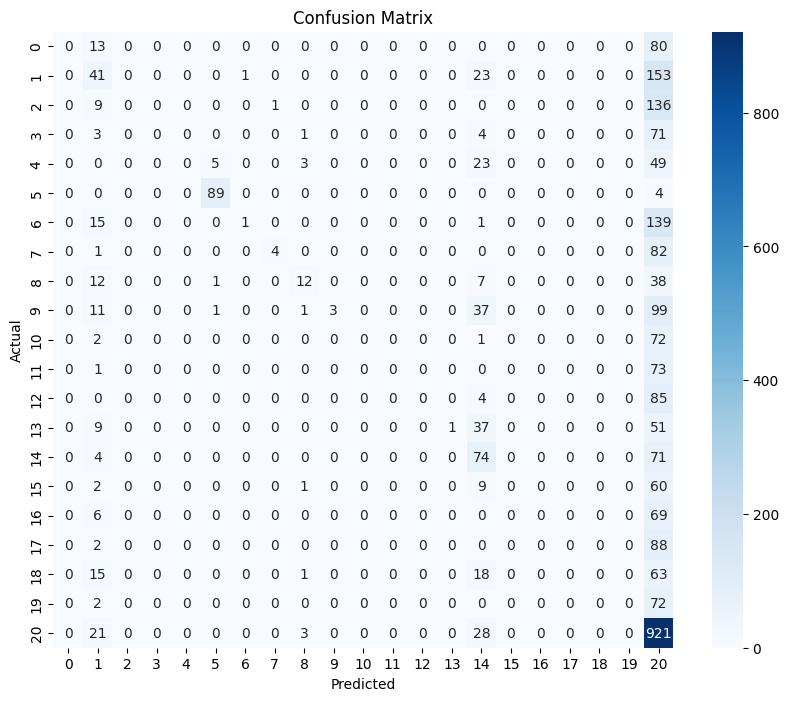

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.24      0.19      0.21       218
           2       0.00      0.00      0.00       146
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00        80
           5       0.93      0.96      0.94        93
           6       0.50      0.01      0.01       156
           7       0.80      0.05      0.09        87
           8       0.55      0.17      0.26        70
           9       1.00      0.02      0.04       152
          10       0.00      0.00      0.00        75
          11       0.00      0.00      0.00        74
          12       0.00      0.00      0.00        89
          13       1.00      0.01      0.02        98
          14       0.28      0.50      0.36       149
          15       0.00      0.00      0.00        72
          16       0.00      0.00      0.00        75
    

C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [483]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['plant', 'disease']

y_test = y_test[['plant','disease']]

# Confusion Matrix
conf_mat = confusion_matrix(y_test['plant'], y_pred_df['plant'])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test['plant'], y_pred_df['plant']))

# Confusion Matrix
conf_mat = confusion_matrix(y_test['disease'], y_pred_df['disease'])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test['disease'], y_pred_df['disease']))

In [484]:
from sklearn.svm import SVC
# Initialize SVM classifier with a polynomial kernel (adjust parameters as needed)
svm_classifier = SVC(kernel='poly', decision_function_shape='ovr', degree=3)  # degree parameter is specific to poly kernel

# Initialize multi-output classifier with the SVM classifier
multi_output_classifier = MultiOutputClassifier(svm_classifier, n_jobs=-1)  # Use n_jobs=-1 to utilize all available CPUs

# Fit the multi-output classifier to the training data
multi_output_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = multi_output_classifier.predict(X_test)

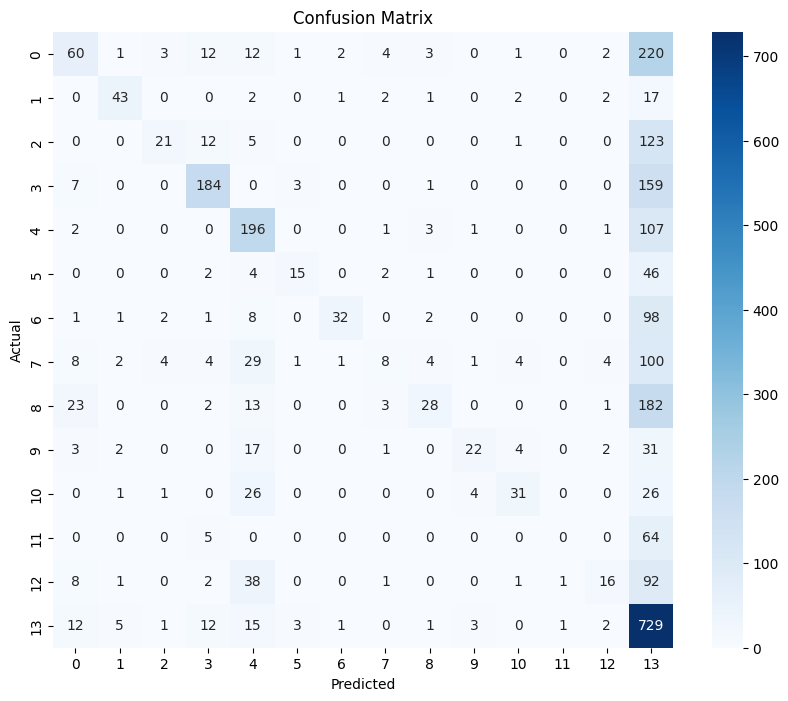

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.19      0.27       321
           1       0.77      0.61      0.68        70
           2       0.66      0.13      0.22       162
           3       0.78      0.52      0.62       354
           4       0.54      0.63      0.58       311
           5       0.65      0.21      0.32        70
           6       0.86      0.22      0.35       145
           7       0.36      0.05      0.08       170
           8       0.64      0.11      0.19       252
           9       0.71      0.27      0.39        82
          10       0.70      0.35      0.47        89
          11       0.00      0.00      0.00        69
          12       0.53      0.10      0.17       160
          13       0.37      0.93      0.52       785

    accuracy                           0.46      3040
   macro avg       0.58      0.31      0.35      3040
weighted avg       0.54      0.46      0.40      3040



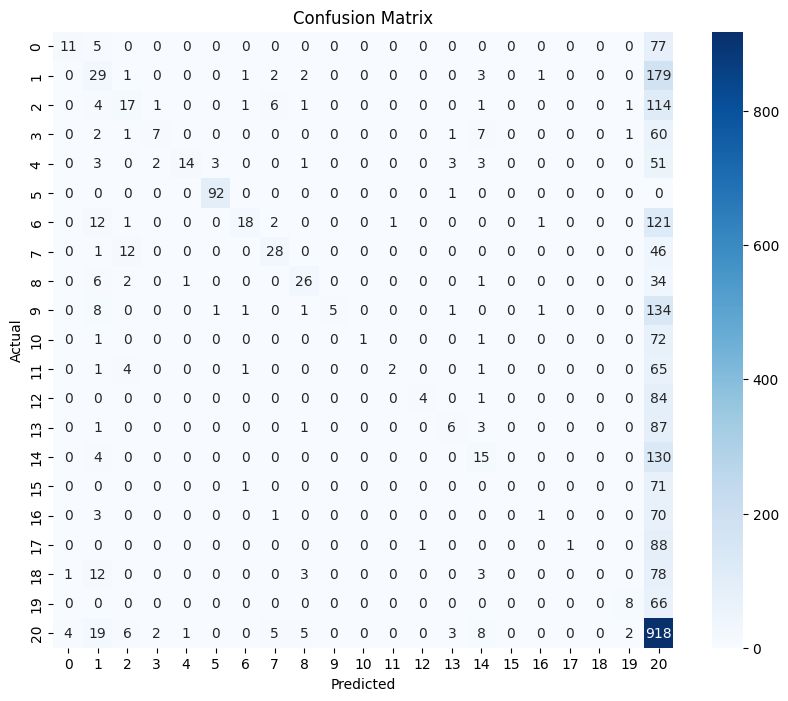

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.12      0.20        93
           1       0.26      0.13      0.18       218
           2       0.39      0.12      0.18       146
           3       0.58      0.09      0.15        79
           4       0.88      0.17      0.29        80
           5       0.96      0.99      0.97        93
           6       0.78      0.12      0.20       156
           7       0.64      0.32      0.43        87
           8       0.65      0.37      0.47        70
           9       1.00      0.03      0.06       152
          10       1.00      0.01      0.03        75
          11       0.67      0.03      0.05        74
          12       0.80      0.04      0.09        89
          13       0.40      0.06      0.11        98
          14       0.32      0.10      0.15       149
          15       0.00      0.00      0.00        72
          16       0.25      0.01      0.03        75
    

C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\My\DS_Weiterbildung\DS_Project\plantRecognition\.venv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [485]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ['plant', 'disease']

y_test = y_test[['plant','disease']]

# Confusion Matrix
conf_mat = confusion_matrix(y_test['plant'], y_pred_df['plant'])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test['plant'], y_pred_df['plant']))

# Confusion Matrix
conf_mat = confusion_matrix(y_test['disease'], y_pred_df['disease'])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test['disease'], y_pred_df['disease']))

## PCA=10 +  Multi-Layer Perceptron (MLP) 

### simple MLP

In [121]:
def check_gpu_tensorflow():
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        print("GPUs are available:")
        for gpu in gpus:
            print(f" - {gpu.name}")
    else:
        print("No GPUs are available.")

In [122]:
check_gpu_tensorflow()

GPUs are available:
 - /physical_device:GPU:0


In [123]:
# Deep learning Dense layers

In [124]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout

In [125]:
# Plant type branch
num_plant_types = len(plant_types)  
# Disease branch
num_diseases = len(disease_types)  

In [305]:
input_layer = Input(shape=(pca_n_comp,))

# Fully connected layers
x = Dense(256, activation='relu')(input_layer)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

plant_type_output = Dense(num_plant_types, activation='softmax', name='plant_type_output')(x)

disease_output = Dense(num_diseases, activation='softmax', name='disease_output')(x)

# Define the model
model = Model(inputs=input_layer, outputs=[plant_type_output, disease_output])



In [306]:
# Compile the model
model.compile(optimizer='adam',
              loss={'plant_type_output': 'categorical_crossentropy', 'disease_output': 'categorical_crossentropy'},
              metrics={'plant_type_output': 'accuracy', 'disease_output': 'accuracy'})

In [307]:
# Summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 256)          2816        ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 256)          0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 128)          32896       ['dropout[0][0]']                
                                                                                              

In [126]:
# Performing one-hot encoding with dtype as float
y_train_plant_encoded = pd.get_dummies(y_train['plant'], dtype=float)
# Performing one-hot encoding with dtype as float
y_train_disease_encoded = pd.get_dummies(y_train['disease'], dtype=float)

In [127]:
# Performing one-hot encoding with dtype as float
y_test_plant_encoded = pd.get_dummies(y_test['plant'], dtype=float)
# Performing one-hot encoding with dtype as float
y_test_disease_encoded = pd.get_dummies(y_test['disease'], dtype=float)

In [381]:
history = model.fit(X_train, 
                    {'plant_type_output': y_train_plant_encoded, 'disease_output': y_train_disease_encoded},
                    epochs=1000,
                    batch_size=32,
                    validation_data=(X_test, {'plant_type_output': y_test_plant_encoded, 'disease_output': y_test_disease_encoded}),verbose=0)

In [387]:
print(history.history['val_plant_type_output_accuracy'][-1])  # Validation accuracy for plant type output
print(history.history['val_disease_output_accuracy'][-1])  # Validation accuracy for disease output

0.6039473414421082
0.5694078803062439


In [388]:
print(history.history['val_plant_type_output_loss'][-1])  # Validation loss for plant type output
print(history.history['val_disease_output_loss'][-1])  # Validation loss for disease output

1.149158239364624
1.3199868202209473


In [386]:
len(history.history['val_plant_type_output_accuracy'])

1000

In [382]:
from tensorflow.keras.models import save_model
# Save the entire model
model.save('my_model.h5')


In [391]:
import pickle
# Save the training history
with open('history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


In [ ]:
'''
from tensorflow.keras.models import load_model
# Load the model
loaded_model = load_model('my_model.h5')


In [393]:
"""
import pickle
# Load the training history
with open('history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)
"""

"\nimport pickle\n# Load the training history\nwith open('history.pkl', 'rb') as file:\n    loaded_history = pickle.load(file)\n"

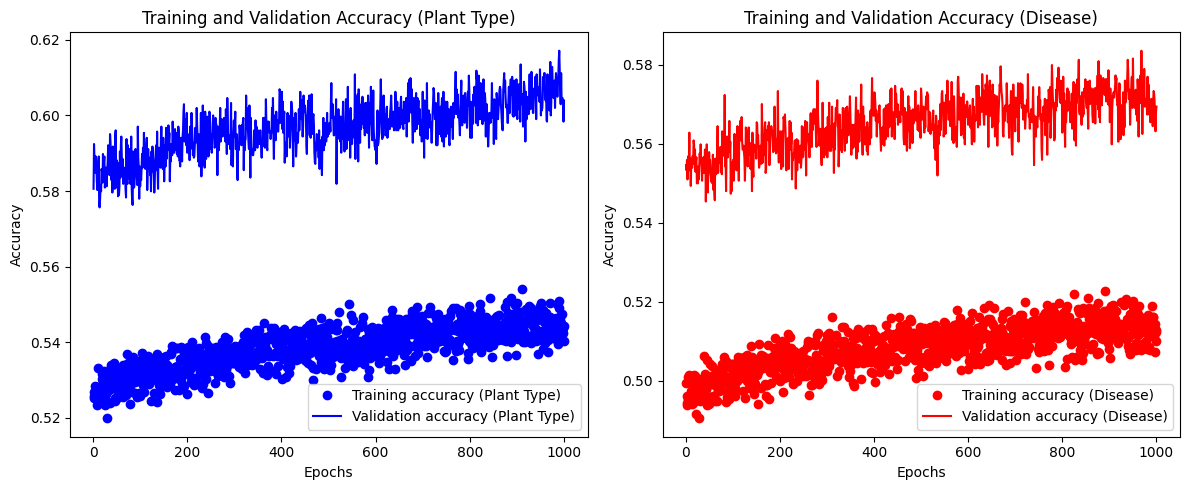

In [394]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
# Extract accuracy and validation accuracy
history_dict = history.history
accuracy = history_dict['plant_type_output_accuracy']  # Replace 'plant_type_output_accuracy' with the actual key if different
val_accuracy = history_dict['val_plant_type_output_accuracy']  # Replace 'val_plant_type_output_accuracy' with the actual key if different

# If you have 'disease_output_accuracy' as well, you can extract that similarly
# For example:
disease_accuracy = history_dict['disease_output_accuracy']
val_disease_accuracy = history_dict['val_disease_output_accuracy']

# Define the number of epochs
epochs = range(1, len(accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy (Plant Type)')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy (Plant Type)')
plt.title('Training and Validation Accuracy (Plant Type)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, disease_accuracy, 'ro', label='Training accuracy (Disease)')
plt.plot(epochs, val_disease_accuracy, 'r', label='Validation accuracy (Disease)')
plt.title('Training and Validation Accuracy (Disease)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig("model_01.png")
plt.show()


### MLP complexer model

In [ ]:
# Plant type branch
num_plant_types = len(plant_types)  
# Disease branch
num_diseases = len(disease_types)  

# Performing one-hot encoding with dtype as float
y_train_plant_encoded = pd.get_dummies(y_train['plant'], dtype=float)
# Performing one-hot encoding with dtype as float
y_train_disease_encoded = pd.get_dummies(y_train['disease'], dtype=float)


# Performing one-hot encoding with dtype as float
y_test_plant_encoded = pd.get_dummies(y_test['plant'], dtype=float)
# Performing one-hot encoding with dtype as float
y_test_disease_encoded = pd.get_dummies(y_test['disease'], dtype=float)

In [128]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation

input_layer = Input(shape=(pca_n_comp,))

# First fully connected block
x = Dense(512)(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

# Second fully connected block
x = Dense(256)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

# Third fully connected block
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

# Output layers for plant type and disease classification
plant_type_output = Dense(num_plant_types, activation='softmax', name='plant_type_output')(x)
disease_output = Dense(num_diseases, activation='softmax', name='disease_output')(x)

# Define the model
model = Model(inputs=input_layer, outputs=[plant_type_output, disease_output])

# Compile the model (make sure to replace 'loss_function' and 'metrics' with appropriate values)
model.compile(optimizer='adam', 
              loss={'plant_type_output': 'categorical_crossentropy', 'disease_output': 'categorical_crossentropy'},
              metrics={'plant_type_output': 'accuracy', 'disease_output': 'accuracy'})

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 512)          5632        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 512)         2048        ['dense_3[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 activation_3 (Activation)      (None, 512)          0           ['batch_normalization_3[0][0]

#### train the model

In [130]:
history = model.fit(X_train, 
                    {'plant_type_output': y_train_plant_encoded, 'disease_output': y_train_disease_encoded},
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, {'plant_type_output': y_test_plant_encoded, 'disease_output': y_test_disease_encoded}),verbose=1)

Epoch 1/100
380/380 [==============================] - 7s 18ms/step - loss: 3.3950 - plant_type_output_loss: 1.5962 - disease_output_loss: 1.7987 - plant_type_output_accuracy: 0.4618 - disease_output_accuracy: 0.4271 - val_loss: 2.9431 - val_plant_type_output_loss: 1.3737 - val_disease_output_loss: 1.5694 - val_plant_type_output_accuracy: 0.5312 - val_disease_output_accuracy: 0.5010
Epoch 2/100
380/380 [==============================] - 7s 18ms/step - loss: 3.3992 - plant_type_output_loss: 1.5930 - disease_output_loss: 1.8062 - plant_type_output_accuracy: 0.4609 - disease_output_accuracy: 0.4234 - val_loss: 2.9437 - val_plant_type_output_loss: 1.3752 - val_disease_output_loss: 1.5685 - val_plant_type_output_accuracy: 0.5319 - val_disease_output_accuracy: 0.5000
Epoch 3/100
380/380 [==============================] - 7s 19ms/step - loss: 3.3804 - plant_type_output_loss: 1.5858 - disease_output_loss: 1.7946 - plant_type_output_accuracy: 0.4654 - disease_output_accuracy: 0.4323 - val_loss:

#### show training results

In [131]:
print("accuracy plant type: ",history.history['val_plant_type_output_accuracy'][-1])  # Validation accuracy for plant type output
print("accuracy disease: ",history.history['val_disease_output_accuracy'][-1])  # Validation accuracy for disease output

accuracy plant type:  0.5740131735801697
accuracy disease:  0.5315789580345154


In [132]:
print(history.history['val_plant_type_output_loss'][-1])  # Validation loss for plant type output
print(history.history['val_disease_output_loss'][-1])  # Validation loss for disease output

1.250950574874878
1.4373100996017456


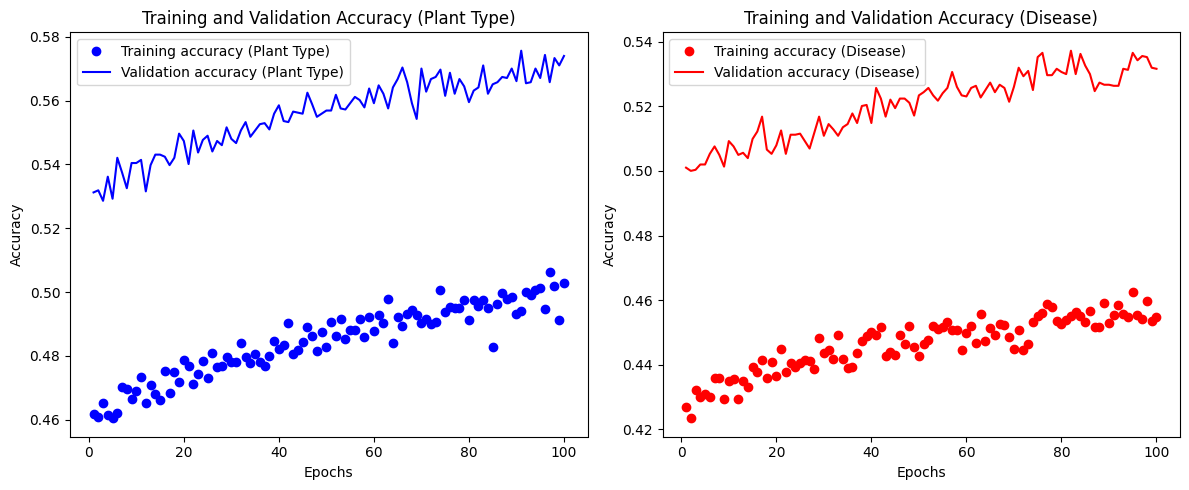

In [133]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
# Extract accuracy and validation accuracy
history_dict = history.history
accuracy = history_dict['plant_type_output_accuracy']  # Replace 'plant_type_output_accuracy' with the actual key if different
val_accuracy = history_dict['val_plant_type_output_accuracy']  # Replace 'val_plant_type_output_accuracy' with the actual key if different

# If you have 'disease_output_accuracy' as well, you can extract that similarly
# For example:
disease_accuracy = history_dict['disease_output_accuracy']
val_disease_accuracy = history_dict['val_disease_output_accuracy']

# Define the number of epochs
epochs = range(1, len(accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy (Plant Type)')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy (Plant Type)')
plt.title('Training and Validation Accuracy (Plant Type)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, disease_accuracy, 'ro', label='Training accuracy (Disease)')
plt.plot(epochs, val_disease_accuracy, 'r', label='Validation accuracy (Disease)')
plt.title('Training and Validation Accuracy (Disease)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig("MLP_complexer_01.png")
plt.show()
